<a href="https://colab.research.google.com/github/AQLT/NLP/blob/main/Pr%C3%A9vision_cat%C3%A9gorie_m%C3%A9tier_ROME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Downloading the database

All the data are gathered in a gist repository. You don't need to run the code of this section where we :

1. Download description from the Onisep database with webscrapping (https://data.laregion.fr/explore/dataset/onisep-metiers-onisep/table/)

2. Format Pole Emploi databases (https://www.pole-emploi.org/opendata/repertoire-operationnel-des-meti.html?type=article)

Données : https://www.data.gouv.fr/fr/datasets/repertoire-operationnel-des-metiers-et-des-emplois-rome/#_

Lien onisep : https://data.laregion.fr/explore/dataset/onisep-metiers-onisep/table/

Lien description ROME : 
https://candidat.pole-emploi.fr/marche-du-travail/fichemetierrome?codeRome=E1301

Liens entre ROME et autres bases (type PCS) : https://www.pole-emploi.org/opendata/repertoire-operationnel-des-meti.html?type=article



## 1.1 Onisep

In [ ]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup

In [ ]:
!wget 'https://data.laregion.fr/explore/dataset/onisep-metiers-onisep/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B' -O onisep.csv

--2021-04-04 12:52:21--  https://data.laregion.fr/explore/dataset/onisep-metiers-onisep/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B
Resolving data.laregion.fr (data.laregion.fr)... 109.232.232.161, 171.33.103.241
Connecting to data.laregion.fr (data.laregion.fr)|109.232.232.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘onisep.csv’

onisep.csv              [   <=>              ] 460.52K  1.08MB/s    in 0.4s    

2021-04-04 12:52:24 (1.08 MB/s) - ‘onisep.csv’ saved [471572]



In [ ]:
onisep_table = pd.read_csv("onisep.csv",sep=";")
onisep_table = onisep_table.dropna(subset=['code ROME', 'lien site onisep.fr'])
onisep_table = onisep_table[["libellé métier", "lien site onisep.fr", "GFE", "domaine/sous-domaine ONISEP","code ROME"]]
onisep_table = onisep_table.rename(columns={"libellé métier": "metier",
                                            "lien site onisep.fr": "url",
                                            "domaine/sous-domaine ONISEP": "domaine_ONISEP",
                                            "code ROME": "rome_code"})
onisep_table["sous_domaine_ONISEP"] = onisep_table["domaine_ONISEP"].apply(lambda x: re.sub(".*/","",x))
onisep_table["domaine_ONISEP"] = onisep_table["domaine_ONISEP"].apply(lambda x: re.sub("/.*","",x))
onisep_table

,metier,url,GFE,domaine_ONISEP,rome_code,sous_domaine_ONISEP
0,architecte,http://www.onisep.fr/http/redirection/metier/i...,C : Bâtiment,construction - architecture - travaux publics,F1101,architecture
1,géomètre-topographe,http://www.onisep.fr/http/redirection/metier/i...,C : Bâtiment,construction - architecture - travaux publics,F1108,sciences de la Terre
2,technicien / technicienne de maintenance en gé...,http://www.onisep.fr/http/redirection/metier/i...,"H : Electricité, énergie, électronique",construction - architecture - travaux publics,I1308,énergies
3,menuisier / menuisière,http://www.onisep.fr/http/redirection/metier/i...,M : Travail du bois,construction - architecture - travaux publics,H2202,bois
4,acheteur / acheteuse,http://www.onisep.fr/http/redirection/metier/i...,"Q : Commerce, gestion, finances","commerce, marketing, vente",M1101,grande distribution et petits commerces
...,...,...,...,...,...,...
1137,data manager,http://www.onisep.fr/http/redirection/metier/i...,P : Gestion et traitement de l'information (in...,"informatique, internet",M1802,mathématiques
1138,ingénieur / ingénieure en caractérisation des ...,http://www.onisep.fr/http/redirection/metier/i...,"J : Transformation des matériaux, procédés (bi...","matières premières, fabrication, industries",H1206,matériaux
1139,ingénieur / ingénieure de maintenance industri...,http://www.onisep.fr/http/redirection/metier/i...,F : Mécanique,électricité - électronique - robotique,I1102,mécanique (généralités)
1140,metteur / metteuse en scène,http://www.onisep.fr/http/redirection/metier/i...,"V : Arts, spectacle, audiovisuel","arts, culture, artisanat",L1301,arts du spectacle


In [ ]:
#20 minutes to run
def dl_description(url):
  page = requests.get(url)
  soup = BeautifulSoup(page.content, 'html.parser')
  results = soup.find(id="en-quoi-consiste-ce-metier")
  paragraph = results.find_all('p')
  return ("\n".join([text.get_text() for text in paragraph]))
onisep_table["description"] = onisep_table.url.apply(dl_description)

In [ ]:
onisep_table["description"] = onisep_table["description"].apply(lambda x: re.sub("\xa0", " ", x))
onisep_table = onisep_table.rename(columns={"onisep_description": "description"}).drop(columns=["url"])
onisep_table.to_csv("onisep_description.csv", index=False)
onisep_table

,metier,GFE,domaine_ONISEP,rome_code,sous_domaine_ONISEP,description
0,architecte,C : Bâtiment,construction - architecture - travaux publics,F1101,architecture,"Construction d'un immeuble, réaménagement d'un..."
1,géomètre-topographe,C : Bâtiment,construction - architecture - travaux publics,F1108,sciences de la Terre,"L'oeil rivé dans le viseur de son tachéomètre,..."
2,technicien / technicienne de maintenance en gé...,"H : Electricité, énergie, électronique",construction - architecture - travaux publics,I1308,énergies,"Professionnel de l'ambiance et du confort, le ..."
3,menuisier / menuisière,M : Travail du bois,construction - architecture - travaux publics,H2202,bois,"Travailler le bois, lui donner une seconde vie..."
4,acheteur / acheteuse,"Q : Commerce, gestion, finances","commerce, marketing, vente",M1101,grande distribution et petits commerces,Le rôle d'un acheteur est d'acheter des produi...
...,...,...,...,...,...,...
1137,data manager,P : Gestion et traitement de l'information (in...,"informatique, internet",M1802,mathématiques,Né de l'explosion des données dans les entrepr...
1138,ingénieur / ingénieure en caractérisation des ...,"J : Transformation des matériaux, procédés (bi...","matières premières, fabrication, industries",H1206,matériaux,L'ingénieur en caractérisation des matériaux c...
1139,ingénieur / ingénieure de maintenance industri...,F : Mécanique,électricité - électronique - robotique,I1102,mécanique (généralités),Grâce à cet expert en maintenance industrielle...
1140,metteur / metteuse en scène,"V : Arts, spectacle, audiovisuel","arts, culture, artisanat",L1301,arts du spectacle,Quand les 3 coups résonnent dans la salle et q...


In [ ]:
!wget https://gist.githubusercontent.com/AQLT/fcc36e58fc92cb976920a2bff7291d49/raw/3f50f6eb07e9076d54d30d9b4607d98fae7cb546/onisep_description.csv -O onisep_description.csv

--2021-04-04 12:51:38--  https://gist.githubusercontent.com/AQLT/48429076bb8bde9d3f66e3e278ef5c8b/raw/3e5a681284899b508f6a837551a264b98aee0dc5/onisep_description.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1309416 (1.2M) [text/plain]
Saving to: ‘onisep_description.csv’

onisep_description. 100%[===================>]   1.25M  --.-KB/s    in 0.07s   

2021-04-04 12:51:38 (18.9 MB/s) - ‘onisep_description.csv’ saved [1309416/1309416]



In [ ]:
onisep = pd.read_csv("onisep_description.csv",index_col=0)
onisep

,metier,url,GFE,domaine_ONISEP,code_rome,description
0,architecte,http://www.onisep.fr/http/redirection/metier/i...,C : Bâtiment,construction - architecture - travaux publics/...,F1101,"Construction d'un immeuble, réaménagement d'un..."
1,géomètre-topographe,http://www.onisep.fr/http/redirection/metier/i...,C : Bâtiment,construction - architecture - travaux publics/...,F1108,"L'oeil rivé dans le viseur de son tachéomètre,..."
2,technicien / technicienne de maintenance en gé...,http://www.onisep.fr/http/redirection/metier/i...,"H : Electricité, énergie, électronique",construction - architecture - travaux publics/...,I1308,"Professionnel de l'ambiance et du confort, le ..."
3,menuisier / menuisière,http://www.onisep.fr/http/redirection/metier/i...,M : Travail du bois,construction - architecture - travaux publics/...,H2202,"Travailler le bois, lui donner une seconde vie..."
4,acheteur / acheteuse,http://www.onisep.fr/http/redirection/metier/i...,"Q : Commerce, gestion, finances","commerce, marketing, vente/achat, approvisionn...",M1101,Le rôle d'un acheteur est d'acheter des produi...
...,...,...,...,...,...,...
1137,data manager,http://www.onisep.fr/http/redirection/metier/i...,P : Gestion et traitement de l'information (in...,"informatique, internet/informatique (généralit...",M1802,Né de l'explosion des données dans les entrepr...
1138,ingénieur / ingénieure en caractérisation des ...,http://www.onisep.fr/http/redirection/metier/i...,"J : Transformation des matériaux, procédés (bi...","matières premières, fabrication, industries/ma...",H1206,L'ingénieur en caractérisation des matériaux c...
1139,ingénieur / ingénieure de maintenance industri...,http://www.onisep.fr/http/redirection/metier/i...,F : Mécanique,électricité - électronique - robotique/électro...,I1102,Grâce à cet expert en maintenance industrielle...
1140,metteur / metteuse en scène,http://www.onisep.fr/http/redirection/metier/i...,"V : Arts, spectacle, audiovisuel","arts, culture, artisanat/arts du spectacle",L1301,Quand les 3 coups résonnent dans la salle et q...


## 1.2 Pole Emploi

In [ ]:
import pandas as pd
import re

In [ ]:
!wget https://api.emploi-store.fr/api/docs/romeopen/REF_ROME_CSV/1/RefRomeCsv.zip -O metadata.zip
!unzip metadata.zip
!rm metadata.zip

--2021-04-04 11:39:15--  https://api.emploi-store.fr/api/docs/romeopen/REF_ROME_CSV/1/RefRomeCsv.zip
Resolving api.emploi-store.fr (api.emploi-store.fr)... 185.215.64.15
Connecting to api.emploi-store.fr (api.emploi-store.fr)|185.215.64.15|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 1509706 (1.4M) [application/zip]
Saving to: ‘metadata.zip’

metadata.zip        100%[===================>]   1.44M   486KB/s    in 3.0s    

2021-04-04 11:39:19 (486 KB/s) - ‘metadata.zip’ saved [1509706/1509706]

Archive:  metadata.zip
  inflating: unix_coherence_item_v346_utf8.csv  
  inflating: unix_composition_bloc_v346_utf8.csv  
  inflating: unix_cr_gd_dp_appellations_v346_utf8.csv  
  inflating: unix_cr_gd_dp_v346_utf8.csv  
  inflating: unix_descriptif_rubrique_v346_utf8.csv  
  inflating: unix_domaine_professionnel_v346_utf8.csv  
  inflating: unix_grand_domaine_v346_utf8.csv  
  inflating: unix_item_arborescence_v346_utf8.csv  
  inflating: unix_item_v346_utf8.csv  
  i

In the ROME database, there are two tree views:

- The principal one (`code_type_referentiel = 6`) organised in 4 levels:
  * 14 major fields (*grands domaines*)
  * 110 professional fields (*domaines professionnels*)
  * 532 ROME forms (*fiches ROME*)
  * 11 112 job names (*appellations métier*)
- The thematic one (`code_type_referentiel = 7`) with 17 main fields associated to the 532 ROME forms.

In the Pole Emploi database we have exhaustive description of the ROME jobs (532 observations), whereas in the Onisep database we have non exhaustive description of 1 064 jobs (with the associated ROME forms)

In [ ]:
arbo = pd.read_csv("unix_item_arborescence_v346_utf8.csv")

In [ ]:
thematic_tree = arbo[(arbo["code_type_noeud"]==3)&(arbo["code_type_referentiel"]==7)]
thematic_tree = thematic_tree.rename(columns={"code_noeud": "rome_code",
                                              "code_pere": "thematic_code",
                                              "libelle_item_arbo": "rome_title"})
thematic_tree = thematic_tree.drop(columns = ['code_ogr', 'code_item_arbo_associe', 'code_type_noeud',
       'libelle_type_noeud', 'statut'])
print(thematic_tree)
th_tree_desc = arbo[(arbo["code_type_noeud"]==2)&(arbo["code_type_referentiel"]==7)]
th_tree_desc = th_tree_desc.drop(columns = ['code_ogr', 'code_item_arbo_associe', 'code_type_noeud',
       'libelle_type_noeud', 'code_pere',"statut","code_type_referentiel"])
th_tree_desc = th_tree_desc.rename(columns={"code_noeud": "thematic_code",
                                            "libelle_item_arbo": "thematic_title"})
print(th_tree_desc)
thematic_tree = pd.merge(th_tree_desc,thematic_tree)
thematic_tree

      code_type_referentiel  ...                                         rome_title
675                       7  ...                            Bûcheronnage et élagage
676                       7  ...                     Entretien des espaces naturels
677                       7  ...         Aménagement et entretien des espaces verts
678                       7  ...         Aménagement et entretien des espaces verts
679                       7  ...                   Protection du patrimoine naturel
...                     ...  ...                                                ...
1179                      7  ...                      Courses et livraisons express
1180                      7  ...                      Courses et livraisons express
1181                      7  ...  Conduite et livraison par tournées sur courte ...
1182                      7  ...  Conduite et livraison par tournées sur courte ...
1183                      7  ...  Exploitation et manoeuvre des remontées mé

,thematic_code,thematic_title,code_type_referentiel,rome_code,rome_title
0,001,Métiers de l'environnement et du développement...,7,A1201,Bûcheronnage et élagage
1,001,Métiers de l'environnement et du développement...,7,A1202,Entretien des espaces naturels
2,001,Métiers de l'environnement et du développement...,7,A1203,Aménagement et entretien des espaces verts
3,001,Métiers de l'environnement et du développement...,7,A1204,Protection du patrimoine naturel
4,001,Métiers de l'environnement et du développement...,7,A1205,Sylviculture
...,...,...,...,...,...
504,017,Métiers accessibles sans diplôme et sans expér...,7,N4101,Conduite de transport de marchandises sur long...
505,017,Métiers accessibles sans diplôme et sans expér...,7,N4102,Conduite de transport de particuliers
506,017,Métiers accessibles sans diplôme et sans expér...,7,N4103,Conduite de transport en commun sur route
507,017,Métiers accessibles sans diplôme et sans expér...,7,N4104,Courses et livraisons express


In [ ]:
principal_tree = arbo[(arbo["code_type_noeud"]==3)&(arbo["code_type_referentiel"]==6)]
principal_tree = principal_tree.rename(columns={"code_noeud": "rome_code",
                                              "code_pere": "professional_code",
                                              "libelle_item_arbo": "rome_title"})
principal_tree = principal_tree.drop(columns = ['code_ogr', 'code_item_arbo_associe', 'code_type_noeud',
       'libelle_type_noeud', 'statut'])
print(principal_tree)
pr_tree_desc = arbo[(arbo["code_type_noeud"]==2)&(arbo["code_type_referentiel"]==6)&(arbo["code_pere"]!="Racine AP")]
pr_tree_desc = pr_tree_desc.drop(columns = ['code_ogr', 'code_item_arbo_associe', 'code_type_noeud',
       'libelle_type_noeud',"statut","code_type_referentiel"])
pr_tree_desc = pr_tree_desc.rename(columns={"code_noeud": "professional_code",
                                            "code_pere": "major_code",
                                            "libelle_item_arbo": "professional_title",})
print(pr_tree_desc)
maj_tree_desc = arbo[(arbo["code_type_noeud"]==2)&(arbo["code_type_referentiel"]==6)&(arbo["code_pere"]=="Racine AP")]
maj_tree_desc = maj_tree_desc.drop(columns = ['code_ogr', 'code_item_arbo_associe', 'code_type_noeud',
       'libelle_type_noeud',"statut","code_type_referentiel", "code_pere"])
maj_tree_desc = maj_tree_desc.rename(columns={"code_noeud": "major_code",
                                            "libelle_item_arbo": "major_title"})
print(principal_tree)
principal_tree = pd.merge(pd.merge(maj_tree_desc,pr_tree_desc),
                          principal_tree)
principal_tree

     code_type_referentiel  ...                                         rome_title
125                      6  ...          Conduite d'engins agricoles et forestiers
126                      6  ...                            Bûcheronnage et élagage
127                      6  ...                     Entretien des espaces naturels
128                      6  ...         Aménagement et entretien des espaces verts
129                      6  ...                   Protection du patrimoine naturel
..                     ...  ...                                                ...
652                      6  ...                                 Conduite sur rails
653                      6  ...                  Contrôle des transports en commun
654                      6  ...                        Circulation du réseau ferré
655                      6  ...  Exploitation et manoeuvre des remontées mécani...
656                      6  ...                          Manoeuvre du réseau ferré

[53

,major_code,major_title,professional_code,professional_title,code_type_referentiel,rome_code,rome_title
0,A,"Agriculture et Pêche, Espaces naturels et Espa...",A11,Engins agricoles et forestiers,6,A1101,Conduite d'engins agricoles et forestiers
1,A,"Agriculture et Pêche, Espaces naturels et Espa...",A12,Espaces naturels et espaces verts,6,A1201,Bûcheronnage et élagage
2,A,"Agriculture et Pêche, Espaces naturels et Espa...",A12,Espaces naturels et espaces verts,6,A1202,Entretien des espaces naturels
3,A,"Agriculture et Pêche, Espaces naturels et Espa...",A12,Espaces naturels et espaces verts,6,A1203,Aménagement et entretien des espaces verts
4,A,"Agriculture et Pêche, Espaces naturels et Espa...",A12,Espaces naturels et espaces verts,6,A1204,Protection du patrimoine naturel
...,...,...,...,...,...,...,...
527,N,Transport et Logistique,N43,Personnel navigant du transport terrestre,6,N4301,Conduite sur rails
528,N,Transport et Logistique,N43,Personnel navigant du transport terrestre,6,N4302,Contrôle des transports en commun
529,N,Transport et Logistique,N44,Personnel sédentaire du transport ferroviaire ...,6,N4401,Circulation du réseau ferré
530,N,Transport et Logistique,N44,Personnel sédentaire du transport ferroviaire ...,6,N4402,Exploitation et manoeuvre des remontées mécani...


In [ ]:
principal_tree.to_csv("principal_tree.csv", index=False)
thematic_tree.to_csv("thematic_tree.csv", index=False)

In the Pole Emploi database, there are many kind of texts associated to a ROME form. In the `unix_texte_v346_utf8.csv` database, you have three categories:

1. `definition`: a description of the job
2. `acces_a_em`: the required experience/diploma 
3. `cond_exercice_activite`: condition for exercising activity (for example "The activity may involve handling loads").

In [ ]:
rome_text = pd.read_csv("unix_texte_v346_utf8.csv")
rome_def = rome_text[rome_text["libelle_type_texte"]=='definition']
rome_def= rome_def.rename(columns={"libelle_texte": "description",
                                   "code_rome": "rome_code"}).drop(columns = ["position_libelle_txt","code_type_texte","libelle_type_texte"])
rome_def

,rome_code,description
0,A1101,"Réalise des travaux mécanisés agricoles, sylvi..."
1,A1201,Réalise des opérations de coupe et d''entretie...
2,A1201,Peut débarder les grumes. Peut estimer la vale...
3,A1201,Peut diriger une équipe ou diriger une entrepr...
4,A1202,Aménage et entretient des écosystèmes (espaces...
...,...,...
1497,N4402,Peut informer les clients sur les caractéristi...
1498,N4402,Peut coordonner l''activité d''une équipe.
1499,N4403,Réalise des opérations de formation de trains ...
1500,N4403,Peut acheminer une rame dans un périmètre limité.


In [ ]:
# Concatenation of multiple phrases
rome_def = rome_def.groupby(['rome_code'])["description"].apply(lambda x: '\n'.join(x)).reset_index()
rome_def

,rome_code,description
0,A1101,"Réalise des travaux mécanisés agricoles, sylvi..."
1,A1201,Réalise des opérations de coupe et d''entretie...
2,A1202,Aménage et entretient des écosystèmes (espaces...
3,A1203,Aménage et entretient des espaces verts (parcs...
4,A1204,Effectue la surveillance de site (espaces natu...
...,...,...
527,N4301,"Conduit un véhicule sur rails (train, métro, ...."
528,N4302,Contrôle les droits d''accès des voyageurs aux...
529,N4401,Surveille et coordonne les mouvements des trai...
530,N4402,"Réalise des opérations de mise en fonction, de..."


In [ ]:
rome_def.to_csv("rome_description.csv",index=False)

# 2. Algorithms

# 2.1 Preparing the data
All the data are gathered in a gist repository

In [1]:
import pandas as pd
!wget https://gist.github.com/AQLT/329c4af5e9418e94debe0ed721ba71ea/archive/10d55254af799e657dfc296ea7d2e725da57dd12.zip -O data.zip
!unzip -d data/ -j  -o data.zip
!rm data.zip

--2021-04-07 15:22:55--  https://gist.github.com/AQLT/329c4af5e9418e94debe0ed721ba71ea/archive/10d55254af799e657dfc296ea7d2e725da57dd12.zip
Resolving gist.github.com (gist.github.com)... 140.82.121.4
Connecting to gist.github.com (gist.github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/gist/329c4af5e9418e94debe0ed721ba71ea/zip/10d55254af799e657dfc296ea7d2e725da57dd12 [following]
--2021-04-07 15:22:55--  https://codeload.github.com/gist/329c4af5e9418e94debe0ed721ba71ea/zip/10d55254af799e657dfc296ea7d2e725da57dd12
Resolving codeload.github.com (codeload.github.com)... 140.82.121.10
Connecting to codeload.github.com (codeload.github.com)|140.82.121.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘data.zip’

data.zip                [ <=>                ] 440.85K  --.-KB/s    in 0.04s   

2021-04-07 15:22:55 (9.82 MB/s) - ‘data.zip’ saved [45

In [2]:
principal_tree = pd.read_csv("data/principal_tree.csv")
thematic_tree = pd.read_csv("data/thematic_tree.csv")
onisep_description = pd.read_csv("data/onisep_description.csv")
rome_description = pd.read_csv("data/rome_description.csv")
rome_description["table"] = "rome"
onisep_description["table"] = "onisep"
onisep_description = onisep_description.drop(columns=["metier","GFE","domaine_ONISEP","sous_domaine_ONISEP"])
data = pd.concat([rome_description, onisep_description])
data

,rome_code,description,table
0,A1101,"Réalise des travaux mécanisés agricoles, sylvi...",rome
1,A1201,Réalise des opérations de coupe et d''entretie...,rome
2,A1202,Aménage et entretient des écosystèmes (espaces...,rome
3,A1203,Aménage et entretient des espaces verts (parcs...,rome
4,A1204,Effectue la surveillance de site (espaces natu...,rome
...,...,...,...
1059,M1802,Né de l'explosion des données dans les entrepr...,onisep
1060,H1206,L'ingénieur en caractérisation des matériaux c...,onisep
1061,I1102,Grâce à cet expert en maintenance industrielle...,onisep
1062,L1301,Quand les 3 coups résonnent dans la salle et q...,onisep


Let's test with the principal tree at the main level

In [ ]:
data2 = pd.merge(data, principal_tree)
data2 = data2.drop(columns = ["professional_code", "code_type_referentiel","professional_title"])
data2

,rome_code,description,table,major_code,major_title,rome_title
0,A1101,"Réalise des travaux mécanisés agricoles, sylvi...",rome,A,"Agriculture et Pêche, Espaces naturels et Espa...",Conduite d'engins agricoles et forestiers
1,A1101,"Tracteur, moissonneuse-batteuse, ensileuse, ép...",onisep,A,"Agriculture et Pêche, Espaces naturels et Espa...",Conduite d'engins agricoles et forestiers
2,A1101,"Depuis la cabine de sa machine, le conducteur ...",onisep,A,"Agriculture et Pêche, Espaces naturels et Espa...",Conduite d'engins agricoles et forestiers
3,A1101,"Depuis la cabine de sa machine, le conducteur ...",onisep,A,"Agriculture et Pêche, Espaces naturels et Espa...",Conduite d'engins agricoles et forestiers
4,A1101,"Tracteur, moissonneuse-batteuse, ensileuse, ép...",onisep,A,"Agriculture et Pêche, Espaces naturels et Espa...",Conduite d'engins agricoles et forestiers
...,...,...,...,...,...,...
1591,N4401,Le technicien de la circulation ferroviaire SN...,onisep,N,Transport et Logistique,Circulation du réseau ferré
1592,N4401,Le technicien de la circulation ferroviaire SN...,onisep,N,Transport et Logistique,Circulation du réseau ferré
1593,N4402,"Réalise des opérations de mise en fonction, de...",rome,N,Transport et Logistique,Exploitation et manoeuvre des remontées mécani...
1594,N4402,"Sur les pistes de ski, une panne d'une télécab...",onisep,N,Transport et Logistique,Exploitation et manoeuvre des remontées mécani...


We can notice that the dataset is not perfectly balanced :

In [ ]:
from collections import Counter

Counter(data2["major_code"])

Counter({'A': 110,
         'B': 46,
         'C': 48,
         'D': 120,
         'E': 96,
         'F': 110,
         'G': 82,
         'H': 281,
         'I': 71,
         'J': 87,
         'K': 252,
         'L': 59,
         'M': 156,
         'N': 78})

# 2.1 LSTM

article : https://towardsdatascience.com/multiclass-text-classification-using-lstm-in-pytorch-eac56baed8df

code : https://jovian.ai/aakanksha-ns/lstm-multiclass-text-classification

À faire :

- actualiser les programmes (prendre le meilleur des trois modèles)

- Changer la loss

- enlever références au RMSE

- changer le tokenizer

- regarder les différences entre les optimizer ?

- fonction qui prévoit une catégorie à partir d'un descriptif

- cpu-iser ?

## Code qui marche

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

import numpy as np
from collections import Counter

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, plot_roc_curve,mean_squared_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sn

import nltk
from tqdm import tqdm
from gensim.models.phrases import Phrases, Phraser
from nltk.tokenize import TreebankWordTokenizer, TweetTokenizer
import numpy as np

seed_val = 42

In [4]:
# We keep only the relevant columns
y_variable = "major_code"
data_lstm = pd.merge(data, principal_tree)[["description", y_variable]]
data_lstm

,description,major_code
0,"Réalise des travaux mécanisés agricoles, sylvi...",A
1,"Tracteur, moissonneuse-batteuse, ensileuse, ép...",A
2,"Depuis la cabine de sa machine, le conducteur ...",A
3,"Depuis la cabine de sa machine, le conducteur ...",A
4,"Tracteur, moissonneuse-batteuse, ensileuse, ép...",A
...,...,...
1591,Le technicien de la circulation ferroviaire SN...,N
1592,Le technicien de la circulation ferroviaire SN...,N
1593,"Réalise des opérations de mise en fonction, de...",N
1594,"Sur les pistes de ski, une panne d'une télécab...",N


In [5]:
# we change the grades to 0-numbering
tag_to_ix = {}
i=0
for code in data_lstm[y_variable].unique():
  tag_to_ix[code]=i
  i += 1
print(tag_to_ix)
data_lstm['label'] = data_lstm[y_variable].replace(tag_to_ix)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13}


In [6]:
tokenizer = TweetTokenizer()

def remove_hashtags(tokens):
  tokens = map(lambda x: x.replace('#', ''), tokens)
  return list(tokens)

def remove_url(tokens):
  tokens = filter(lambda x: "http" not in x, tokens)
  return list(tokens)

def remove_html(tokens):
  tokens = filter(lambda x: x[0]+x[-1] != '<>', tokens)
  return list(tokens)
def tokenize (text):
  tokens = tokenizer.tokenize(text)
  tokens = remove_url(tokens)
  tokens = remove_html(tokens)
  tokens = remove_hashtags(tokens)
  tokens = list(map(lambda x: x.lower(), tokens))
  return tokens

In [7]:
#count number of occurences of each word
counts = Counter()
for index, row in data_lstm.iterrows():
    counts.update(tokenize(row['description']))
#deleting infrequent words
print("num_words before:",len(counts.keys()))
for word in list(counts):
    if counts[word] < 2:
        del counts[word]
print("num_words after:",len(counts.keys()))

num_words before: 12834
num_words after: 8377


We lost about 4 000 words! This is expected because our corpus is quite small, the chance of having repeated words is quite small.
We then create a vocabulary to index mapping and encode our description text using this mapping. I’ve chosen the maximum length of any review to be 130 words because the average length of description was around 112.

In [8]:
#creating vocabulary
vocab2index = {"":0, "UNK":1}
words = ["", "UNK"]
for word in counts:
    vocab2index[word] = len(words)
    words.append(word)

In [9]:
def encode_sentence(text, vocab2index, N=130):
    tokenized = tokenize(text)
    encoded = np.zeros(N, dtype=int)
    enc1 = np.array([vocab2index.get(word, vocab2index["UNK"]) for word in tokenized])
    length = min(N, len(enc1))
    encoded[:length] = enc1[:length]
    return encoded, length

In [10]:
data_lstm['encoded'] = data_lstm['description'].apply(lambda x: np.array(encode_sentence(x,vocab2index ),dtype=object))
data_lstm.head()

,description,major_code,label,encoded
0,"Réalise des travaux mécanisés agricoles, sylvi...",A,0,"[[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 3, 13, 7..."
1,"Tracteur, moissonneuse-batteuse, ensileuse, ép...",A,0,"[[38, 7, 39, 7, 40, 7, 41, 42, 7, 43, 44, 45, ..."
2,"Depuis la cabine de sa machine, le conducteur ...",A,0,"[[111, 27, 112, 23, 113, 114, 7, 45, 46, 115, ..."
3,"Depuis la cabine de sa machine, le conducteur ...",A,0,"[[111, 27, 112, 23, 113, 114, 7, 45, 46, 115, ..."
4,"Tracteur, moissonneuse-batteuse, ensileuse, ép...",A,0,"[[38, 7, 39, 7, 40, 7, 41, 42, 7, 43, 44, 45, ..."


In [11]:
X = list(data_lstm['encoded'])
y = list(data_lstm['label'])
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      test_size=0.3,
                                                      random_state=seed_val)

In [12]:
class DescriptionDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.y = Y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return torch.from_numpy(self.X[idx][0].astype(np.int32)), self.y[idx], self.X[idx][1]

In [13]:
train_ds = DescriptionDataset(X_train, y_train)
valid_ds = DescriptionDataset(X_valid, y_valid)

In [20]:
batch_size = 5000
vocab_size = len(words)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(valid_ds, batch_size=batch_size)

In [14]:
!nvidia-smi

Wed Apr  7 15:23:48 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [31]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

cuda


In [32]:
def train_model(model, epochs=10, lr=0.001):
  model.to(device)
  parameters = filter(lambda p: p.requires_grad, model.parameters())
  optimizer = torch.optim.Adam(parameters, lr=lr)
  loss_function = F.cross_entropy
  for i in range(epochs):
      model.train()
      sum_loss = 0.0
      total = 0
      for x, y, l in train_dl:
          x = x.long().to(device)
          y = y.long().to(device)
          y_pred = model(x, l)
          optimizer.zero_grad()
          loss = loss_function(y_pred, y)
          loss.backward()
          optimizer.step()
          sum_loss += loss.item()*y.shape[0]
          total += y.shape[0]
      val_loss, val_acc = validation_metrics(model, val_dl)
      if i % 5 == 1:
          print("train loss %.3f, val loss %.3f, val accuracy %.3f" % (sum_loss/total, val_loss, val_acc))

def validation_metrics (model, valid_dl):
  model.eval()
  correct = 0
  total = 0
  sum_loss = 0.0
  for x, y, l in valid_dl:
      x = x.long().to(device)
      y = y.long().to(device)
      y_hat = model(x, l)
      loss = F.cross_entropy(y_hat, y)
      pred = torch.max(y_hat, 1)[1]
      correct += (pred == y).float().sum()
      total += y.shape[0]
      sum_loss += loss.item()*y.shape[0]
      #sum_rmse += np.sqrt(mean_squared_error(pred, y.unsqueeze(-1)))*y.shape[0]
  return sum_loss/total, correct/total

In [22]:
class LSTM_fixed_len(torch.nn.Module) :
  def __init__(self, vocab_size, embedding_dim, hidden_dim) :
      super().__init__()
      self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
      self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
      self.linear = nn.Linear(hidden_dim, len(tag_to_ix))
      self.dropout = nn.Dropout(0.2)
      
  def forward(self, x, l):
      x = self.embeddings(x)
      x = self.dropout(x)
      lstm_out, (ht, ct) = self.lstm(x)
      return self.linear(ht[-1])

In [24]:
class LSTM_variable_input(torch.nn.Module) :
  def __init__(self, vocab_size, embedding_dim, hidden_dim) :
      super().__init__()
      self.hidden_dim = hidden_dim
      self.dropout = nn.Dropout(0.3)
      self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
      self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
      self.linear = nn.Linear(hidden_dim, len(tag_to_ix))
      
  def forward(self, x, s):
      x = self.embeddings(x)
      x = self.dropout(x)
      x_pack = pack_padded_sequence(x, s, batch_first=True, enforce_sorted=False)
      out_pack, (ht, ct) = self.lstm(x_pack)
      out = self.linear(ht[-1])
      return out

In [34]:
model_fixed =  LSTM_fixed_len(vocab_size, 50, 50)
train_model(model_fixed, epochs=100, lr=0.01)

train loss 2.593, val loss 2.582, val accuracy 0.148, and val rmse 0.000
train loss 2.375, val loss 2.475, val accuracy 0.184, and val rmse 0.000
train loss 2.217, val loss 2.408, val accuracy 0.217, and val rmse 0.000
train loss 2.019, val loss 2.344, val accuracy 0.248, and val rmse 0.000
train loss 1.765, val loss 2.279, val accuracy 0.296, and val rmse 0.000
train loss 1.530, val loss 2.301, val accuracy 0.315, and val rmse 0.000
train loss 1.339, val loss 2.299, val accuracy 0.336, and val rmse 0.000
train loss 1.210, val loss 2.313, val accuracy 0.374, and val rmse 0.000
train loss 1.100, val loss 2.437, val accuracy 0.340, and val rmse 0.000
train loss 1.028, val loss 2.465, val accuracy 0.353, and val rmse 0.000
train loss 0.994, val loss 2.487, val accuracy 0.353, and val rmse 0.000
train loss 0.962, val loss 2.561, val accuracy 0.372, and val rmse 0.000
train loss 0.918, val loss 2.618, val accuracy 0.365, and val rmse 0.000
train loss 0.915, val loss 2.591, val accuracy 0.34

In [35]:
model_variable = LSTM_variable_input(vocab_size, 50, 50)
train_model(model_variable, epochs=100, lr=0.01)

train loss 2.572, val loss 2.562, val accuracy 0.163, and val rmse 0.000
train loss 2.363, val loss 2.471, val accuracy 0.182, and val rmse 0.000
train loss 2.153, val loss 2.379, val accuracy 0.230, and val rmse 0.000
train loss 1.888, val loss 2.416, val accuracy 0.228, and val rmse 0.000
train loss 1.646, val loss 2.225, val accuracy 0.338, and val rmse 0.000
train loss 1.364, val loss 2.195, val accuracy 0.363, and val rmse 0.000
train loss 1.108, val loss 2.301, val accuracy 0.397, and val rmse 0.000
train loss 0.883, val loss 2.314, val accuracy 0.420, and val rmse 0.000
train loss 0.716, val loss 2.369, val accuracy 0.426, and val rmse 0.000
train loss 0.560, val loss 2.515, val accuracy 0.436, and val rmse 0.000
train loss 0.460, val loss 2.476, val accuracy 0.466, and val rmse 0.000
train loss 0.351, val loss 2.530, val accuracy 0.470, and val rmse 0.000
train loss 0.283, val loss 2.700, val accuracy 0.451, and val rmse 0.000
train loss 0.222, val loss 2.742, val accuracy 0.47

In [45]:
key_list = list(tag_to_ix.keys())
val_list = list(tag_to_ix.values())

In [43]:
def diagnostics(model, valid_dl):
  model.eval()
  y_true = []
  y_pred = []
  y_hat = np.array([], dtype=np.int32).reshape(0,len(tag_to_ix))
  for x, y, l in valid_dl:
    x = x.long().to(device)
    y = y.long().to(device)
    y_hat_tmp = model(x, l).cpu()
    y_hat = np.concatenate(( y_hat, y_hat_tmp.detach().numpy()))
    pred = torch.max(y_hat_tmp, 1)[1]
    y_true += [key_list[val_list.index(i)] for i in y]
    y_pred += [key_list[val_list.index(i)] for i in pred]

  print( classification_report(y_true, y_pred) )
  cm = confusion_matrix(y_true, y_pred , labels = key_list) 
  df_cm = pd.DataFrame(cm, index=key_list, columns=key_list)
  # config plot sizes
  sn.set(font_scale=1.2)
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cmap='coolwarm', linewidth=0.5, fmt="")
  plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
  plt.show()

              precision    recall  f1-score   support

           A       0.37      0.55      0.44        31
           B       0.18      0.30      0.22        10
           C       0.33      0.19      0.24        16
           D       0.73      0.56      0.64        39
           E       0.89      0.50      0.64        32
           F       0.31      0.13      0.18        39
           G       0.39      0.27      0.32        26
           H       0.35      0.55      0.43        67
           I       0.33      0.18      0.24        22
           J       0.29      0.19      0.23        21
           K       0.33      0.55      0.41        84
           L       0.50      0.08      0.13        26
           M       0.32      0.28      0.30        43
           N       0.69      0.39      0.50        23

    accuracy                           0.39       479
   macro avg       0.43      0.34      0.35       479
weighted avg       0.43      0.39      0.38       479



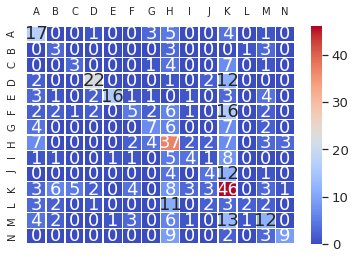

In [46]:
diagnostics(model_fixed, val_dl)

              precision    recall  f1-score   support

           A       0.64      0.58      0.61        31
           B       0.28      0.50      0.36        10
           C       0.50      0.19      0.27        16
           D       0.76      0.72      0.74        39
           E       0.64      0.50      0.56        32
           F       0.47      0.23      0.31        39
           G       0.48      0.46      0.47        26
           H       0.58      0.64      0.61        67
           I       0.36      0.45      0.40        22
           J       0.35      0.57      0.44        21
           K       0.54      0.49      0.51        84
           L       0.13      0.08      0.10        26
           M       0.27      0.40      0.32        43
           N       0.47      0.61      0.53        23

    accuracy                           0.48       479
   macro avg       0.46      0.46      0.44       479
weighted avg       0.49      0.48      0.48       479



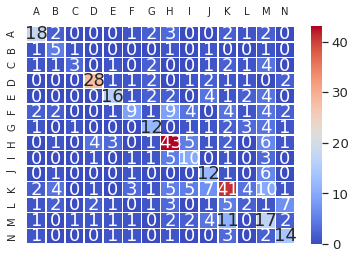

In [47]:
diagnostics(model_variable, val_dl)

In [ ]:
# même chose mais à la main pour faire des tests
model = model_fixed
valid_dl = val_dl

In [ ]:
model.eval()
y_true = []
y_pred = []
y_hat = np.array([], dtype=np.int32).reshape(0,len(tag_to_ix))
for x, y, l in valid_dl:
    x = x.long()
    y = y.long()
    y_hat_tmp = model(x, l)
    y_hat = np.concatenate(( y_hat, y_hat_tmp.detach().numpy()))
    pred = torch.max(y_hat_tmp, 1)[1]
    y_true += [key_list[val_list.index(i)] for i in y]
    y_pred += [key_list[val_list.index(i)] for i in pred]

              precision    recall  f1-score   support

           A       0.42      0.36      0.39        22
           B       0.25      0.18      0.21        11
           C       0.26      0.50      0.34        10
           D       0.54      0.50      0.52        26
           E       0.45      0.28      0.34        18
           F       0.27      0.17      0.21        18
           G       0.50      0.29      0.36        14
           H       0.51      0.71      0.59        49
           I       0.47      0.47      0.47        17
           J       0.21      0.27      0.24        11
           K       0.56      0.44      0.49        57
           L       0.29      0.38      0.33        13
           M       0.43      0.43      0.43        35
           N       0.48      0.58      0.52        19

    accuracy                           0.44       320
   macro avg       0.40      0.40      0.39       320
weighted avg       0.45      0.44      0.44       320



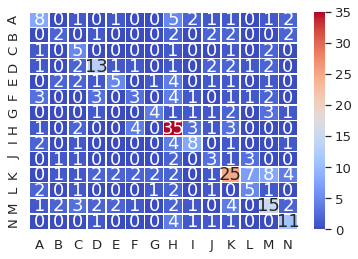

In [ ]:
print( classification_report(y_true, y_pred) )
cm = confusion_matrix(y_true, y_pred , labels = key_list) 
df_cm = pd.DataFrame(cm, index=key_list, columns=key_list)
# config plot sizes
sn.set(font_scale=1.2)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cmap='coolwarm', linewidth=0.5, fmt="")
plt.show()

Pas sur que les courbes roc soient très adaptées mais je mets quand même le code au cas où

In [ ]:
y_trueb = []
for y in y_true:
  tmp = [0]*len(tag_to_ix)
  tmp[tag_to_ix[y]] = 1
  y_trueb.append(tmp)
y_trueb = np.array(y_trueb)

A 0.7776082977425259
B 0.752574286554869
C 0.737741935483871
D 0.7978806907378336
E 0.6160779985283297
F 0.48693892568064756
G 0.7488328664799253
H 0.8829731154454402
I 0.865851291011454
J 0.6922624301265077
K 0.7525515309185511
L 0.688048108243548
M 0.7596491228070176
N 0.7496065745759747


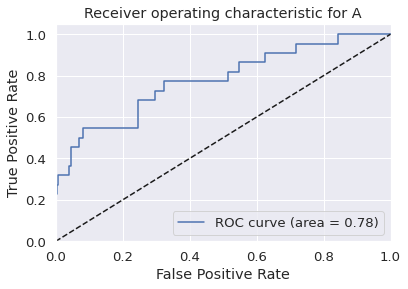

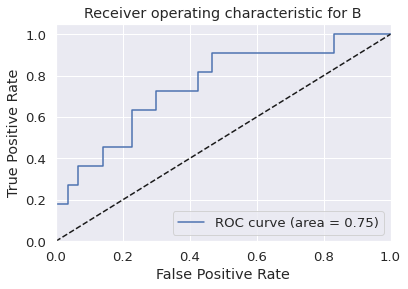

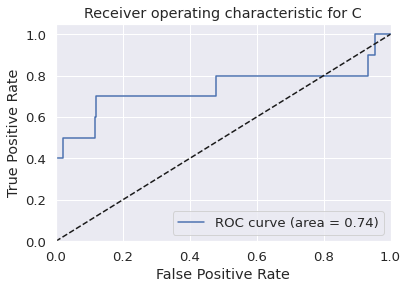

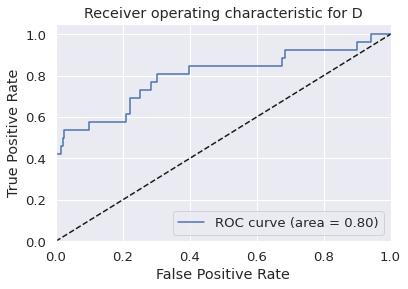

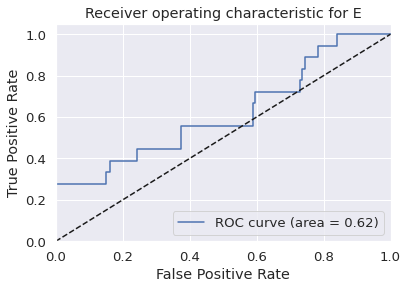

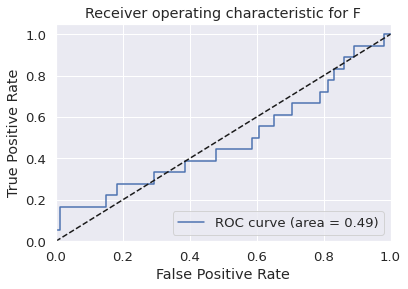

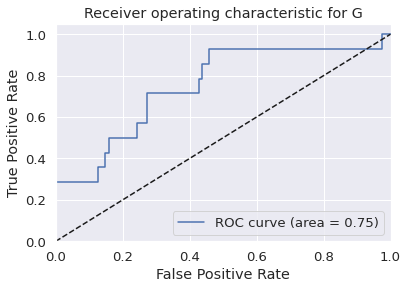

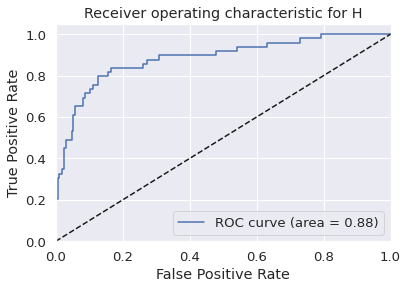

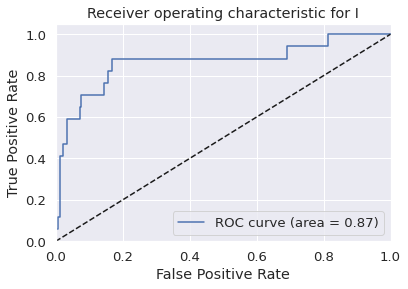

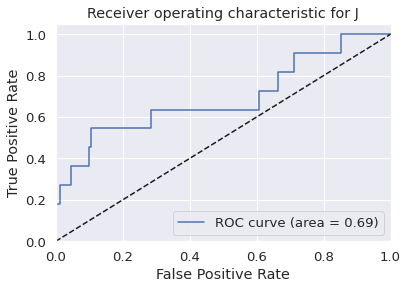

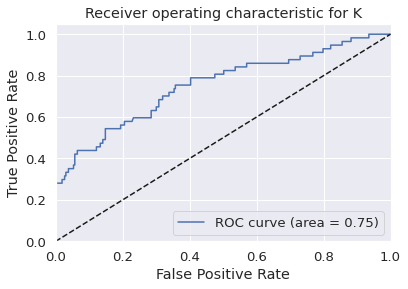

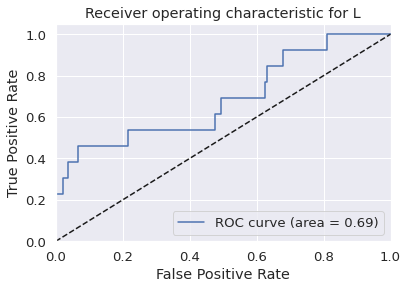

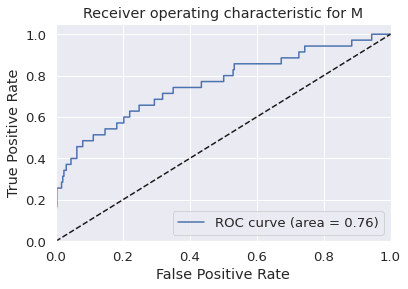

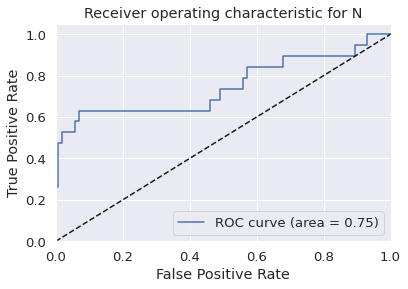

In [ ]:
labels = tag_to_ix.keys()
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, label in enumerate(labels):
  fpr[i], tpr[i], _ = roc_curve(y_trueb[:, i], y_hat[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])
  print(label, roc_auc[i])

for i, label in enumerate(labels):
  plt.figure()
  plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic for '+label)
  plt.legend(loc="lower right")
  plt.show()


## 1. Brouillons
À partir d'ici tentatives de modifications du code précédent à partir des programmes du TP. J'ai eu une erreur, reprendre petit à petit.

In [ ]:
class SequenceLabeller(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, num_classes, sequence_model="LSTM"):
        super(SequenceLabeller, self).__init__()

        self.hidden_dim = hidden_dim
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        
        if sequence_model == "LSTM":
            # The LSTM takes word embeddings as inputs, and outputs hidden states
            # with dimensionality hidden_dim.
            self.seq = nn.LSTM(embedding_dim, hidden_dim,batch_first=True)
        else:
            raise(Exception("Sequence model {} not supported".format(sequence_model)))

        # The linear layer that maps from hidden state space to class space
        self.hidden2tag = nn.Linear(hidden_dim, num_classes)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        seq_output, (h_n,c_n) = self.seq(embeds)
        tag_space = self.hidden2tag(seq_output)
        # Although we will be performing binary classification, this is a 
        # general implementation displaying what should be done for n_classes>2
        #tag_scores = F.log_softmax(tag_space, dim=2) # Computationally efficient for the criterion
        tag_scores = F.log_softmax(tag_space, dim=1) # Computationally efficient for the criterion
        # 2 ou 1 ? ici on voit 1 plutôt https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html
        return tag_scores

In [ ]:
from torch.nn.functional import one_hot
def prepare_sequence(seq, to_ix):
    idxs = [to_ix[w] if w in to_ix else len(to_ix) for w in seq]
    idxs = torch.tensor(idxs, dtype=torch.long).unsqueeze(0)
    return idxs

def train_model(model, epochs=10, lr=0.001):
    loss_function = nn.NLLLoss()
    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optimizer = torch.optim.SGD(parameters, lr=lr) 
    for i in range(epochs):
        model.train()
        sum_loss = 0.0
        total = 0
        for x, y, l in train_dl:
          model.zero_grad()
          targets = prepare_sequence([y], tag_to_ix)
          one_hot_targets = one_hot(targets.squeeze(0), num_classes=len(tag_to_ix))
          x = x.long()
          y = y.long()
          tag_scores = model(x,l)
          optimizer.zero_grad()
          loss = loss_function(tag_scores, one_hot_targets)
          loss_mean_ep += loss
          n_sample += 1
          loss.backward()
          optimizer.step()
        if i % 5 == 1:
           print("Epoch {} loss {:0.4f} ".format(epoch, loss/n_sample))

In [ ]:
class SequenceLabeller(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, num_classes, sequence_model="LSTM"):
        super(SequenceLabeller, self).__init__()

        self.hidden_dim = hidden_dim
        self.dropout = nn.Dropout(0.3) # ajout AQLT
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        
        if sequence_model == "LSTM":
            # The LSTM takes word embeddings as inputs, and outputs hidden states
            # with dimensionality hidden_dim.
            self.seq = nn.LSTM(embedding_dim, hidden_dim,batch_first=True)
        else:
            raise(Exception("Sequence model {} not supported".format(sequence_model)))

        # The linear layer that maps from hidden state space to class space
        self.hidden2tag = nn.Linear(hidden_dim, num_classes)

    def forward(self, sentence, l):
        embeds = self.word_embeddings(sentence)
        
        seq_output, (h_n,c_n) = self.seq(embeds)
        tag_space = self.hidden2tag(seq_output)
        # Although we will be performing binary classification, this is a 
        # general implementation displaying what should be done for n_classes>2
        #tag_scores = F.log_softmax(tag_space, dim=2) # Computationally efficient for the criterion
        tag_scores = F.log_softmax(tag_space, dim=1) # Computationally efficient for the criterion
        # 2 ou 1 ? ici on voit 1 plutôt https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html
        return tag_scores

In [ ]:
batch_size = 200
vocab_size = len(words)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(valid_ds, batch_size=batch_size)

In [ ]:
model = SequenceLabeller(130, 100, vocab_size, len(tag_to_ix)) 

In [ ]:
targets = prepare_sequence(y, tag_to_ix)
targets

tensor([[14, 14, 14,  ..., 14, 14, 14]])

In [ ]:
train_ds

In [ ]:
epochs=10
lr=0.01
loss_function = nn.NLLLoss()
parameters = filter(lambda p: p.requires_grad, model.parameters())
optimizer = torch.optim.SGD(parameters, lr=lr) 
for i in range(epochs):
    model.train()
    sum_loss = 0.0
    total = 0
    for x, y, l in train_dl:
      model.zero_grad()
      targets = prepare_sequence(y, tag_to_ix)
      one_hot_targets = one_hot(targets.squeeze(0), num_classes=len(tag_to_ix))
      x = x.long()
      y = y.long()
      tag_scores = model(x,l)
      optimizer.zero_grad()
      loss = loss_function(tag_scores, one_hot_targets)
      loss_mean_ep += loss
      n_sample += 1
      loss.backward()
      optimizer.step()
    if i % 5 == 1:
        print("Epoch {} loss {:0.4f} ".format(epoch, loss/n_sample))

RuntimeError: ignored


Prepare:
- a structure that maps each token in your source vocabulary to a unique index.
- a structure that matches each index to it's corresponding token in the source vocabulary
- a structure that maps each label to an index
- a function that turns a token sequence to the corresponding index sequence

The labels in this case are indexes themselves(`0`, `1`) but they can be otherwise (_e.g._ `positive`, `negative`, `amusing`, `anxious` ...)




In [ ]:
def prepare_sequence(seq, to_ix):
    idxs = [to_ix[w] if w in to_ix else len(to_ix) for w in seq]
    idxs = torch.tensor(idxs, dtype=torch.long).unsqueeze(0)
    return idxs

word_to_ix = {}
tag_to_ix = {}
for sent, tag in training_data:
    if tag not in tag_to_ix:
        tag_to_ix[tag] = len(tag_to_ix)
    for word in sent:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
print(tag_to_ix)


{'H': 0, 'F': 1, 'K': 2, 'E': 3, 'A': 4, 'M': 5, 'D': 6, 'N': 7, 'L': 8, 'I': 9, 'B': 10, 'J': 11, 'C': 12, 'G': 13}


Inspect your data 

In [ ]:
training_data[:6]

### 2.2 Forward pass
Instanciate the model and perform a forward pass on the first sentence in your data.  
See what the scores are before training.  
Note that element i,j of the output is the score for tag j for word i.  
Here we don't need to train, so the code is wrapped in `torch.no_grad()`

In [ ]:
# the additional vocabulary element is to account for unkown words
model = SequenceLabeller(50, 100, len(word_to_ix)+1, len(tag_to_ix)) 
inputs = prepare_sequence(training_data[0][0], word_to_ix)
with torch.no_grad():
    sent_scores = model(torch.cat([inputs]))
    print("Input tokens {} scores {} ".format(inputs, sent_scores))

## Training 
### 3.1  Optimizer and loss
Instanciate an optimizer and a loss function for your network from pytorch. 

In [ ]:
loss_function = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 


Normally, one would use nn.BCELoss for binary classification, but again, we will implement a generic n_class classification loss.

You could also use ``nn.CrossEntropyLoss``, but for that, you have to remove the LogSoftmax because it applies it internally.

### 3.2 Training loop 
Write a loop that goes through the data `n_epochs=40` times, and trains on it.  
The network should train all the word tags in a sentence to produce the entire sentence's label. This fuzzy kind of supervision is called weak-supervision (weakly-supervised learning). 
tip: You should transform your target tags with [one_hot](https://pytorch.org/docs/stable/nn.functional.html#one-hot) before giving them to NLLLoss.

In [ ]:
from torch.nn.functional import one_hot
n_epochs = 40
for epoch in range(n_epochs):  # again, normally you would NOT do 300 epochs, it is toy data
    loss_mean_ep = 0
    n_sample = 0
    for sentence, tags in training_data:
        if len(sentence) < 2: continue
        # Step 1. Remember that Pytorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()
        # Step 2. Get our inputs ready for the network, that is, turn them into
        # Tensors of word indices.
        sentence_in = prepare_sequence(sentence, word_to_ix)
        #import pdb
        #pdb.set_trace()
        targets = prepare_sequence([tags], tag_to_ix)
        one_hot_targets = one_hot(targets.squeeze(0), num_classes=len(tag_to_ix))
        # Step 3. Run our forward pass.
        tag_scores = model(sentence_in)
        # Step 4. Compute the loss, gradients, and update the parameters by
        #  calling optimizer.step()
        #import pdb
        #pdb.set_trace()
        # print(tag_scores.shape, one_hot_targets.shape)
        loss = loss_function(tag_scores, one_hot_targets)
        loss_mean_ep += loss
        n_sample += 1
        loss.backward()
        optimizer.step()
    print("Epoch {} loss {:0.4f} ".format(epoch, loss/n_sample))

Epoch 0 loss 0.0045 
Epoch 1 loss 0.0045 
Epoch 2 loss 0.0045 
Epoch 3 loss 0.0045 
Epoch 4 loss 0.0045 
Epoch 5 loss 0.0045 
Epoch 6 loss 0.0045 
Epoch 7 loss 0.0045 
Epoch 8 loss 0.0045 
Epoch 9 loss 0.0045 
Epoch 10 loss 0.0045 
Epoch 11 loss 0.0045 
Epoch 12 loss 0.0045 
Epoch 13 loss 0.0045 


KeyboardInterrupt: ignored

### 4. Evaluating model 


#### 1 - Evaluate your data qualitatively by inspecting 3 predictions for positive examples and 3 for negative ones on the test data

In [ ]:
with torch.no_grad():
  label_count = [0]*14
  n_samples = 5
  for sentence, tag in test_data:
    label_count[tag_to_ix[tag]] += 1
    if label_count[tag_to_ix[tag]] <= n_samples:
      sentence_in = prepare_sequence(sentence, word_to_ix)
      sentence_tag = tag
      tag_scores = model(sentence_in)
      positive_score = torch.mean(torch.exp(tag_scores.squeeze(0)[:, 1])).item()
      print("{} sentence scored {} \"{}\"."
      "".format(sentence_tag, positive_score,' '.join(sentence)) )
    if (label_count[0] >= n_samples) and (label_count[1] >= n_samples):
      break

I sentence scored 0.06858854740858078 "le technicien électronicien recherche , diagnostique et résout tout dysfonctionnement ou panne des systèmes électroniques . il procède aux différents contrôles et essais à l'aide d'appareils de mesure et de contrôle perfectionnés . en conception , il réalise des schémas électriques à l'aide de logiciels , effectue des simulations électroniques suivies de tests , et rédige des documentations techniques sous la direction d'un ingénieur . en production , il est en charge des tests et répare des cartes électroniques . il analyse le problème , recherche une solution et l'applique . il établit ensuite une synthèse de son intervention . en bureau d'essais , il rédige des procédures de tests ( explications , appareils de mesure à utiliser , réglages à faire ) . il développe une partie du logiciel de tests et des cartes électroniques . il maîtrise les circuits électroniques , leurs composants et leurs différentes fonctions , les appareils de mesure et conn


#### 2 - Evaluate your data quantitatively by measuring the [roc_auc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) on the test set, and generating a [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [ ]:
key_list = list(tag_to_ix.keys())
val_list = list(tag_to_ix.values())
 
# print key with val 100
position = val_list.index(torch.argmax(tag_scores.mean(1)).item())
key_list[val_list.index(torch.argmax(tag_scores.mean(1)).item())]

In [ ]:
torch.argmax(tag_scores.mean(1)).item()
y_true, y_pred = [], []
with torch.no_grad():
  for sentence, tag in test_data:
    y_true.append(tag)
    sentence_in = prepare_sequence(sentence, word_to_ix)
    tag_scores = model(sentence_in)
    y_pred.append(key_list[val_list.index(torch.argmax(tag_scores.mean(1)).item())])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           A       0.00      0.00      0.00        26
           B       0.00      0.00      0.00         7
           C       0.00      0.00      0.00        13
           D       0.12      0.03      0.05        33
           E       0.00      0.00      0.00        26
           F       0.00      0.00      0.00        31
           G       0.04      0.04      0.04        23
           H       0.00      0.00      0.00        61
           I       0.05      0.58      0.08        19
           J       0.00      0.00      0.00        17
           K       0.10      0.01      0.03        68
           L       0.00      0.00      0.00        19
           M       0.50      0.03      0.05        38
           N       0.01      0.06      0.02        18

    accuracy                           0.04       399
   macro avg       0.06      0.05      0.02       399
weighted avg       0.08      0.04      0.02       399



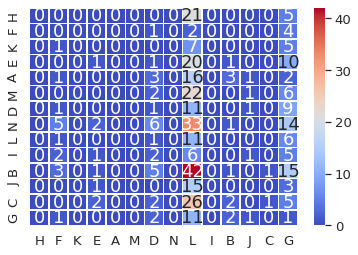

In [ ]:
print( classification_report(y_true, y_pred) )
cm = confusion_matrix(y_true, y_pred) 
df_cm = pd.DataFrame(cm, index=key_list, columns=key_list)
# config plot sizes
sn.set(font_scale=1.2)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cmap='coolwarm', linewidth=0.5, fmt="")
plt.show()

[

In [ ]:
cm = confusion_matrix(y_true, y_pred) 

In [ ]:
cm

array([[ 0,  0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  5],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  2,  0,  0,  0,  0,  4],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  5],
       [ 0,  0,  0,  1,  0,  0,  1,  0, 20,  0,  1,  0,  0, 10],
       [ 0,  1,  0,  0,  0,  0,  3,  0, 16,  0,  3,  1,  0,  2],
       [ 0,  0,  0,  0,  0,  0,  2,  0, 22,  0,  0,  1,  0,  6],
       [ 0,  1,  0,  0,  0,  0,  1,  0, 11,  0,  0,  1,  0,  9],
       [ 0,  5,  0,  2,  0,  0,  6,  0, 33,  0,  1,  0,  0, 14],
       [ 0,  1,  0,  0,  0,  0,  1,  0, 11,  0,  0,  0,  0,  6],
       [ 0,  2,  0,  1,  0,  0,  2,  0,  6,  0,  0,  1,  0,  5],
       [ 0,  3,  0,  1,  0,  0,  5,  0, 42,  0,  1,  0,  1, 15],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 15,  0,  0,  0,  0,  3],
       [ 0,  0,  0,  2,  0,  0,  2,  0, 26,  0,  2,  0,  1,  5],
       [ 0,  1,  0,  0,  0,  0,  2,  0, 11,  0,  2,  1,  0,  1]])

'H'

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sn

ground_truth, scores = [], []
with torch.no_grad():
  for sentence, tag in test_data:
    sentence_in = prepare_sequence(sentence, word_to_ix)
    ground_truth.append(tag)
    tag_scores = model(sentence_in)
    scores.append(torch.mean(torch.exp(tag_scores.squeeze(0)[:, 1])).item())

print("The AUC is ", roc_auc_score(ground_truth, scores))
print("Classification report:\n", classification_report(ground_truth, 
                                                      np.array(scores)>0.5))

ValueError: ignored

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sn

def show_eval(y_true, y_pred, lb_trained, clf):
  ''' 
  Show eval metrics.  Takes binarized y true and pred along with trained binarizer for label names
  '''
  y_true_names = lb_trained.inverse_transform(y_true)
  y_pred_names = lb_trained.inverse_transform(y_pred)
  print( classification_report(y_true_names, y_pred_names) )
  cm = confusion_matrix(y_true_names, y_pred_names) 
  labels = list(main_fields["libelle_item_arbo"])
  df_cm = pd.DataFrame(cm, index=labels, columns=labels)
  # config plot sizes
  sn.set(font_scale=1.2)
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cmap='coolwarm', linewidth=0.5, fmt="")
  plt.show()

  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i, label in enumerate(labels):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(label, roc_auc[i])

  for i, label in enumerate(labels):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for '+label)
    plt.legend(loc="lower right")
    plt.show()


2

# 2.2 BERT qui marche

https://towardsdatascience.com/multi-class-text-classification-with-deep-learning-using-bert-b59ca2f5c613

In [ ]:
!pip install "transformers==2.5.1"

     |████████████████████████████████| 501kB 17.2MB/s 
     |████████████████████████████████| 870kB 53.6MB/s 
     |████████████████████████████████| 1.2MB 51.6MB/s 
     |████████████████████████████████| 5.6MB 50.5MB/s 
     |████████████████████████████████| 133kB 59.7MB/s 
     |████████████████████████████████| 7.6MB 46.7MB/s 
     |████████████████████████████████| 81kB 10.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.44-cp37-none-any.whl size=886084 sha256=376aabaca3b39f469878875d99aee33e72e90820822140c431efb5c9f8ce0662
  Stored in directory: /root/.cache/pip/wheels/3e/fb/c0/13ab4d63d537658f448366744654323077c4d90069b6512f3c
  Created wheel for botocore: filename=botocore-1.20.45-py2.py3-none-any.whl size=7376554 sha256=9c41389aa5109eda0df40672b8b0d55868c1ba1613791cd569a328108a857be8
  Stored in directory: /root/.cache/pip/wheels/aa/52/93/55b5ff5cf7c74c131a1e771a1fd7cdcaeedee6be1a0a3c9093
Successfully built sacremoses botocore
ERROR: botocore 1.20.45 has requi

In [ ]:
!pip install -U torchtext==0.8.0

     |████████████████████████████████| 7.0MB 11.2MB/s 
  Found existing installation: torchtext 0.9.1
    Uninstalling torchtext-0.9.1:
      Successfully uninstalled torchtext-0.9.1


In [ ]:
import torch
from tqdm.notebook import tqdm

#from transformers import BertTokenizer
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

from transformers.tokenization_camembert import CamembertTokenizer
from transformers import CamembertForSequenceClassification, AdamW, get_linear_schedule_with_warmup

#from transformers import BertForSequenceClassification, CamembertForSequenceClassification
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, plot_roc_curve, f1_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import random

seed_val = 42

In [ ]:
!nvidia-smi

Tue Apr  6 20:05:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

In [ ]:
y_variable = "major_code"
data_bert= pd.merge(data, principal_tree)[["description", y_variable]]
#data_bert = data_bert.rename(columns={"major_code": "label"})

# we change the grades to 0-numbering
tag_to_ix = {}
i=0
for code in data_bert[y_variable].unique():
  tag_to_ix[code]=i
  i += 1
print(tag_to_ix)
data_bert['label'] = data_bert[y_variable].replace(tag_to_ix)
data_bert

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13}


,description,major_code,label
0,"Réalise des travaux mécanisés agricoles, sylvi...",A,0
1,"Tracteur, moissonneuse-batteuse, ensileuse, ép...",A,0
2,"Depuis la cabine de sa machine, le conducteur ...",A,0
3,"Depuis la cabine de sa machine, le conducteur ...",A,0
4,"Tracteur, moissonneuse-batteuse, ensileuse, ép...",A,0
...,...,...,...
1591,Le technicien de la circulation ferroviaire SN...,N,13
1592,Le technicien de la circulation ferroviaire SN...,N,13
1593,"Réalise des opérations de mise en fonction, de...",N,13
1594,"Sur les pistes de ski, une panne d'une télécab...",N,13


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data_bert.index.values, 
                                                  data_bert.label.values, 
                                                  test_size=0.15, 
                                                  random_state=seed_val, 
                                                  stratify=data_bert.label.values)

data_bert['data_type'] = 'not_set'#*data_bert.shape[0]
data_bert.loc[X_train, 'data_type'] = 'train'
data_bert.loc[X_val, 'data_type'] = 'val'

data_bert.groupby(['major_code', 'label', 'data_type']).count()

description
major_code label data_type             
A          0     train               93
                 val                 17
B          1     train               39
                 val                  7
C          2     train               41
                 val                  7
D          3     train              102
                 val                 18
E          4     train               82
                 val                 14
F          5     train               93
                 val                 17
G          6     train               70
                 val                 12
H          7     train              239
                 val                 42
I          8     train               60
                 val                 11
J          9     train               74
                 val                 13
K          10    train              214
                 val                 38
L          11    train               50
                 val                  9
M          12    train              133
                 val                 23
N          13    train               66
                 val                 12

In [ ]:
tokenizer = CamembertTokenizer.from_pretrained("camembert-base", 
                                          do_lower_case=True)
                                          
encoded_data_train = tokenizer.batch_encode_plus(
    data_bert[data_bert.data_type=='train'].description.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    data_bert[data_bert.data_type=='val'].description.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(data_bert[data_bert.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(data_bert[data_bert.data_type=='val'].label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
model = CamembertForSequenceClassification.from_pretrained("camembert-base",
                                                      num_labels=len(tag_to_ix),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

In [ ]:
batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
epochs = 5

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in tag_to_ix.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
!mkdir data_volume

In [ ]:
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals
    
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'data_volume/finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')


Epoch 1
Training loss: 1.7700802522950467
Validation loss: 1.4891747437417506
F1 Score (Weighted): 0.7549545415723541



Epoch 2
Training loss: 1.3418965977245727
Validation loss: 1.16101343780756
F1 Score (Weighted): 0.8668925405109846



Epoch 3
Training loss: 1.0702124383729117
Validation loss: 1.009348632581532
F1 Score (Weighted): 0.865707131336072



Epoch 4
Training loss: 0.937177473201161
Validation loss: 0.9510716089978815
F1 Score (Weighted): 0.8656110400881233



Epoch 5
Training loss: 0.9116643472055418
Validation loss: 0.9510716089978815
F1 Score (Weighted): 0.8656110400881233



In [ ]:
val_loss, predictions, true_vals = evaluate(dataloader_validation)
preds_flat = np.argmax(predictions, axis=1).flatten()
labels_flat = true_vals.flatten()

In [ ]:
key_list = list(tag_to_ix.keys())
val_list = list(tag_to_ix.values())
 
# print key with val 100
y_true = [key_list[val_list.index(i)] for i in true_vals]
y_pred = [key_list[val_list.index(i)] for i in preds_flat]

              precision    recall  f1-score   support

           A       0.94      1.00      0.97        17
           B       0.67      0.57      0.62         7
           C       1.00      1.00      1.00         7
           D       0.90      1.00      0.95        18
           E       1.00      0.57      0.73        14
           F       0.89      0.94      0.91        17
           G       1.00      1.00      1.00        12
           H       0.78      0.93      0.85        42
           I       0.83      0.45      0.59        11
           J       0.91      0.77      0.83        13
           K       0.86      0.84      0.85        38
           L       0.69      1.00      0.82         9
           M       0.91      0.87      0.89        23
           N       1.00      1.00      1.00        12

    accuracy                           0.87       240
   macro avg       0.88      0.85      0.86       240
weighted avg       0.88      0.87      0.87       240



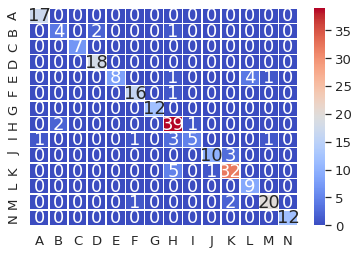

In [ ]:
print( classification_report(y_true, y_pred ) )
cm = confusion_matrix(y_true, y_pred , labels = key_list) 
df_cm = pd.DataFrame(cm, index=key_list, columns=key_list)
# config plot sizes
sn.set(font_scale=1.2)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cmap='coolwarm', linewidth=0.5, fmt="")
plt.show()

In [ ]:
accuracy_per_class(predictions, true_vals)

Class: A
Accuracy: 17/17

Class: B
Accuracy: 4/7

Class: C
Accuracy: 7/7

Class: D
Accuracy: 18/18

Class: E
Accuracy: 8/14

Class: F
Accuracy: 16/17

Class: G
Accuracy: 12/12

Class: H
Accuracy: 39/42

Class: I
Accuracy: 5/11

Class: J
Accuracy: 10/13

Class: K
Accuracy: 32/38

Class: L
Accuracy: 9/9

Class: M
Accuracy: 20/23

Class: N
Accuracy: 12/12



# 2.2 BERT qui ne marche pas

Tentative avec torchtext mais plusieurs complications sans arriver à compiler le code

https://towardsdatascience.com/bert-text-classification-using-pytorch-723dfb8b6b5b

In [ ]:
!pip install "transformers==2.5.1"

In [ ]:
!pip install -U torchtext==0.8.0

Requirement already up-to-date: torchtext==0.8.0 in /usr/local/lib/python3.7/dist-packages (0.8.0)


In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.2MB 5.2MB/s 


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import torch

# Preliminaries

from torchtext.data import Field, TabularDataset, BucketIterator, Iterator

# Models

import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification,CamembertTokenizer

# Training

import torch.optim as optim

# Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
data_bert = data.copy()[["description", "major_code"]]
data_bert = data_bert.rename(columns={"major_code": "label"})

# we change the grades to 0-numbering
tag_to_ix = {}
i=0
for code in data_bert["label"].unique():
  tag_to_ix[code]=i
  i += 1
print(tag_to_ix)
data_bert['label'] = data_bert['label'].apply(lambda x: tag_to_ix[x])
data_bert

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13}


,description,label
0,"Réalise des travaux mécanisés agricoles, sylvi...",0
1,"Tracteur, moissonneuse-batteuse, ensileuse, ép...",0
2,"Depuis la cabine de sa machine, le conducteur ...",0
3,"Depuis la cabine de sa machine, le conducteur ...",0
4,"Tracteur, moissonneuse-batteuse, ensileuse, ép...",0
...,...,...
1591,Le technicien de la circulation ferroviaire SN...,13
1592,Le technicien de la circulation ferroviaire SN...,13
1593,"Réalise des opérations de mise en fonction, de...",13
1594,"Sur les pistes de ski, une panne d'une télécab...",13


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# create train 70% 
df_train, df_devtest = train_test_split(data_bert, test_size=0.3, random_state=42)
print(df_train)
# create dev 15% test 15% (hence 50% from the 30%)
df_dev, df_test = train_test_split(df_devtest, test_size=0.5, random_state=42)
print(df_dev)

                                            description  label
426   Analyseur à fluorescence X ou à source radioac...      5
1384  Essentiel à toute organisation, le comptable e...     12
1271  Le scientifique de « Jurassic Park », c'est lu...     10
346   « Parce que je le vaux bien », « Elle a tout d...      4
1103  Conçoit des programmes de prévention, d''éduca...     10
...                                                 ...    ...
1130  Au sein de bibliothèques municipales, départem...     10
1294  Être au bon endroit, au bon moment, passer ina...     10
860   Surveille et régule une ou plusieurs phases de...      7
1459  L'administrateur réseau veille au bon fonction...     12
1126  Au sein de bibliothèques municipales, départem...     10

[1117 rows x 2 columns]
                                            description  label
1530  Sacs de céréales, ballots de vêtements, oeuvre...     13
415   Expert d'Internet et du marketing, le traffic ...      4
1314  Pour être comédien, il f

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
from transformers.tokenization_camembert import CamembertTokenizer

tokenizer = CamembertTokenizer.from_pretrained("camembert-base")


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
df_train.to_csv('data/train.csv', index=False)
df_dev.to_csv('data/valid.csv', index=False)
df_test.to_csv('data/test.csv', index=False)

In [ ]:
df_train

,description,label
426,Analyseur à fluorescence X ou à source radioac...,5
1384,"Essentiel à toute organisation, le comptable e...",12
1271,"Le scientifique de « Jurassic Park », c'est lu...",10
346,"« Parce que je le vaux bien », « Elle a tout d...",4
1103,"Conçoit des programmes de prévention, d''éduca...",10
...,...,...
1130,"Au sein de bibliothèques municipales, départem...",10
1294,"Être au bon endroit, au bon moment, passer ina...",10
860,Surveille et régule une ou plusieurs phases de...,7
1459,L'administrateur réseau veille au bon fonction...,12


In [ ]:
# Model parameter
MAX_SEQ_LEN = 128
PAD_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
UNK_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.unk_token)

# Fields

label_field = Field(sequential=False, use_vocab=False, batch_first=True, dtype=torch.float)
text_field = Field(use_vocab=False, tokenize=tokenizer.encode, lower=False, include_lengths=False, batch_first=True,
                   fix_length=MAX_SEQ_LEN, pad_token=PAD_INDEX, unk_token=UNK_INDEX)
fields = [('label', label_field), ('description', text_field)]

train, valid, test = TabularDataset.splits(path="data/", train='train.csv', validation='valid.csv',
                                           test='test.csv', format='CSV', fields=fields, skip_header=True)
# Iterators

train_iter = BucketIterator(train, batch_size=16, sort_key=lambda x: len(x.description),
                            device=device, train=True, sort=True, sort_within_batch=True)
valid_iter = BucketIterator(valid, batch_size=16, sort_key=lambda x: len(x.description),
                            device=device, train=True, sort=True, sort_within_batch=True)
test_iter = Iterator(test, batch_size=16, device=device, train=False, shuffle=False, sort=False)

/usr/local/lib/python3.7/dist-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)
/usr/local/lib/python3.7/dist-packages/torchtext/data/example.py:68: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.', UserWarning)
/usr/local/lib/python3.7/dist-packages/torchtext/data/example.py:78: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warn

In [ ]:
class BERT(nn.Module):

    def __init__(self):
        super(BERT, self).__init__()

        options_name = "bert-base-uncased"
        self.encoder = BertForSequenceClassification.from_pretrained(options_name)

    def forward(self, text, label):
        loss, text_fea = self.encoder(text, labels=label)[:2]

        return loss, text_fea

In [ ]:
# Save and Load Functions

def save_checkpoint(save_path, model, valid_loss):

    if save_path == None:
        return
    
    state_dict = {'model_state_dict': model.state_dict(),
                  'valid_loss': valid_loss}
    
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

def load_checkpoint(load_path, model):
    
    if load_path==None:
        return
    
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    
    model.load_state_dict(state_dict['model_state_dict'])
    return state_dict['valid_loss']


def save_metrics(save_path, train_loss_list, valid_loss_list, global_steps_list):

    if save_path == None:
        return
    
    state_dict = {'train_loss_list': train_loss_list,
                  'valid_loss_list': valid_loss_list,
                  'global_steps_list': global_steps_list}
    
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')


def load_metrics(load_path):

    if load_path==None:
        return
    
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    
    return state_dict['train_loss_list'], state_dict['valid_loss_list'], state_dict['global_steps_list']

In [ ]:
# Training Function

def train(model,
          optimizer,
          criterion = nn.NLLLoss(),
          train_loader = train_iter,
          valid_loader = valid_iter,
          num_epochs = 5,
          eval_every = len(train_iter) // 2,
          file_path = "data/",
          best_valid_loss = float("Inf")):
    
    # initialize running values
    running_loss = 0.0
    valid_running_loss = 0.0
    global_step = 0
    train_loss_list = []
    valid_loss_list = []
    global_steps_list = []

    # training loop
    model.train()
    for epoch in range(num_epochs):
        print("toto")
        for (labels, description), _ in train_loader:
            print(tata)
            print(labels, description)
            labels = labels.type(torch.LongTensor)           
            labels = labels.to(device)
            print(labels)
            description = description.type(torch.LongTensor)  
            description = description.to(device)
            print(description)
            output = model(description, labels)
            loss, _ = output

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # update running values
            running_loss += loss.item()
            global_step += 1

            # evaluation step
            if global_step % eval_every == 0:
                model.eval()
                with torch.no_grad():                    

                    # validation loop
                    for (labels, description), _ in valid_loader:
                        labels = labels.type(torch.LongTensor)           
                        labels = labels.to(device)
                        description = description.type(torch.LongTensor)  
                        description = description.to(device)
                        output = model(description, labels)
                        loss, _ = output
                        
                        valid_running_loss += loss.item()

                # evaluation
                average_train_loss = running_loss / eval_every
                average_valid_loss = valid_running_loss / len(valid_loader)
                train_loss_list.append(average_train_loss)
                valid_loss_list.append(average_valid_loss)
                global_steps_list.append(global_step)

                # resetting running values
                running_loss = 0.0                
                valid_running_loss = 0.0
                model.train()

                # print progress
                print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
                      .format(epoch+1, num_epochs, global_step, num_epochs*len(train_loader),
                              average_train_loss, average_valid_loss))
                
                # checkpoint
                if best_valid_loss > average_valid_loss:
                    best_valid_loss = average_valid_loss
                    save_checkpoint(file_path + '/' + 'model.pt', model, best_valid_loss)
                    save_metrics(file_path + '/' + 'metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    
    save_metrics(file_path + '/' + 'metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    print('Finished Training!')

In [ ]:
model = BERT().to(device)
optimizer = optim.Adam(model.parameters(), lr=2e-5)

train(model=model, optimizer=optimizer)

toto


/usr/local/lib/python3.7/dist-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


ValueError: ignored

Model loaded from <== /content/drive/My Drive/transformers/Model/metrics.pt


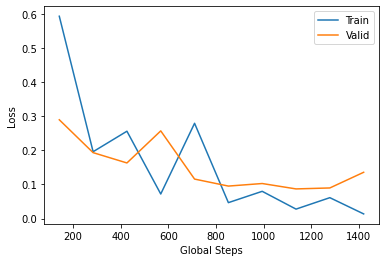

In [ ]:
train_loss_list, valid_loss_list, global_steps_list = load_metrics(destination_folder + '/metrics.pt')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show() 

In [ ]:
class BERT(nn.Module):

    def __init__(self):
        super(BERT, self).__init__()

        options_name = "bert-base-uncased"
        self.encoder = BertForSequenceClassification.from_pretrained(options_name)

    def forward(self, text, label):
        loss, text_fea = self.encoder(text, labels=label)[:2]

        return loss, text_fea

#2.2 test utilisation camemBERT pour toknizer



In [ ]:
!pip install transformers

     |████████████████████████████████| 2.0MB 6.7MB/s 
     |████████████████████████████████| 870kB 42.5MB/s 
     |████████████████████████████████| 3.3MB 41.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.44-cp37-none-any.whl size=886084 sha256=8cf1ab78f5c0de904ee79028edbdd27404ef1687412d30631e5064ad178337a9
  Stored in directory: /root/.cache/pip/wheels/3e/fb/c0/13ab4d63d537658f448366744654323077c4d90069b6512f3c
Successfully built sacremoses


In [ ]:

camembert = BertForSequenceClassification.from_pretrained("camembert-base",
                                  output_hidden_states = False, # Whether the model returns all hidden-states.
                                  )
#camembert = AutoModelWithLMHead.from_pretrained(MODEL_NAME)
# Put the model in "evaluation" mode, meaning feed-forward operation.
camembert.eval()

NameError: ignored

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
labels = torch.tensor([1]).unsqueeze(0)  # Batch size 1
outputs = model(**inputs, labels=labels)
loss = outputs.loss
logits = outputs.logits

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
import torch
import pdb
import torch.nn as nn
from transformers import BertTokenizer, BertModel, AutoModel, AutoTokenizer, AutoModelWithLMHead,AutoModelForSequenceClassification

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
#import logging
#logging.basicConfig(level=logging.INFO)

MODEL_NAME = "camembert-base"

# Load pre-trained model tokenizer (vocabulary)
#tokenizer = BertTokenizer.from_pretrained("camembert-base")
MODEL_NAME = "camembert-base"
#MODEL_NAME = "bert-base-multilingual-cased"
# Load pre-trained model tokenizer (vocabulary)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

camembert = BertModel.from_pretrained(MODEL_NAME,
                                  output_hidden_states = False, # Whether the model returns all hidden-states.
                                  )
camembert = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)
# Put the model in "evaluation" mode, meaning feed-forward operation.
camembert.eval()
def bert_embeding(txt, GPU=False):
  ## Remplace les trois lignes commentées
  indexed_tokens = tokenizer.encode(txt)
  #text = tokenizer.bos_token+txt+tokenizer.eos_token
  #tokenized_text = tokenizer.tokenize(text)
  #indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

  ##Pour récupérer le texte
  #tokenized_text = [tokenizer._convert_id_to_token(idx) for idx in indexed_tokens]
  if GPU:
    tokens_tensor = tokens_tensor.to('cuda')
    segments_tensors = segments_tensors.to('cuda')
    camembert.to('cuda')

  segments_ids = [0 for _ in indexed_tokens]
  tokens_tensor = torch.tensor([indexed_tokens])
  segments_tensors = torch.tensor([segments_ids])
  # Predict all tokens
  with torch.no_grad():
      outputs = camembert(tokens_tensor,segments_tensors)
      predictions = outputs[0]

  return predictions.size(), predictions.mean(1), predictions.mean(1).size() 

Some weights of the model checkpoint at camembert-base were not used when initializing BertModel: ['roberta.embeddings.word_embeddings.weight', 'roberta.embeddings.position_embeddings.weight', 'roberta.embeddings.token_type_embeddings.weight', 'roberta.embeddings.LayerNorm.weight', 'roberta.embeddings.LayerNorm.bias', 'roberta.encoder.layer.0.attention.self.query.weight', 'roberta.encoder.layer.0.attention.self.query.bias', 'roberta.encoder.layer.0.attention.self.key.weight', 'roberta.encoder.layer.0.attention.self.key.bias', 'roberta.encoder.layer.0.attention.self.value.weight', 'roberta.encoder.layer.0.attention.self.value.bias', 'roberta.encoder.layer.0.attention.output.dense.weight', 'roberta.encoder.layer.0.attention.output.dense.bias', 'roberta.encoder.layer.0.attention.output.LayerNorm.weight', 'roberta.encoder.layer.0.attention.output.LayerNorm.bias', 'roberta.encoder.layer.0.intermediate.dense.weight', 'roberta.encoder.layer.0.intermediate.dense.bias', 'roberta.encoder.layer.0

In [ ]:
bert_embeding("Salut Kim, comment tu vas")

(torch.Size([1, 2]), tensor([0.0074]), torch.Size([1]))

In [ ]:
def embed(sentence):
   tokens = camembert.encode(sentence)
   # Extract all layer's features (layer 0 is the embedding layer)
   all_layers = camembert.extract_features(tokens, return_all_hiddens=True)
   pooling_layer = all_layers[-2]
   embedded = pooling_layer.mean(1)  # 1 is the dimension you want to average ovber
   # note, using numpy to take the mean is bad if you want to stay on GPU
   return embedded

In [ ]:
### Loading a model 
import pdb
import torch
import torch.nn as nn
from transformers import AutoModel, AutoTokenizer, AutoModelWithLMHead

## OPTIONAL: if you want to have more information on what's happening under the hood, activate the logger as follows
#import logging
#logging.basicConfig(level=logging.)

MODEL_NAME = "camembert-base"
#MODEL_NAME = "bert-base-multilingual-cased"
# Load pre-trained model tokenizer (vocabulary)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
camembert = AutoModelWithLMHead.from_pretrained(MODEL_NAME)
camembert.eval()

/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:1010: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


CamembertForMaskedLM(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(32005, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerN

In [ ]:
def bert_embeding(txt, GPU=False):
  ## Remplace les trois lignes commentées
  indexed_tokens = tokenizer.encode(txt)
  #text = tokenizer.bos_token+txt+tokenizer.eos_token
  #tokenized_text = tokenizer.tokenize(text)
  #indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

  ##Pour récupérer le texte
  #tokenized_text = [tokenizer._convert_id_to_token(idx) for idx in indexed_tokens]
  if GPU:
    tokens_tensor = tokens_tensor.to('cuda')
    segments_tensors = segments_tensors.to('cuda')
    camembert.to('cuda')

  segments_ids = [0 for _ in indexed_tokens]
  tokens_tensor = torch.tensor([indexed_tokens])
  segments_tensors = torch.tensor([segments_ids])
  # Predict all tokens
  with torch.no_grad():
      outputs = model(tokens_tensor,segments_tensors)
      predictions = outputs[0]

  return predictions.size(), predictions.mean(1), predictions.mean(1).size() 

In [ ]:
bert_embeding("Salut Kim, comment tu vas, toujours en forme ?")

(torch.Size([1, 18, 768]),
 tensor([[ 6.2345e-01,  1.0516e+00,  5.8435e-01, -7.7672e-01,  1.2826e+00,
          -1.0085e+00,  1.7916e+00, -6.6254e-01,  2.4608e-01,  3.8381e-01,
          -1.5677e+00,  9.6081e-01, -4.1236e-01, -2.1830e-02,  1.6973e-01,
          -1.1172e+00,  4.5218e-01, -3.5483e-02, -3.3257e-01, -3.0300e-01,
           7.1735e-01,  1.0063e+00,  7.8866e-01,  4.4988e-01,  2.3711e-02,
          -1.0949e+00,  3.9456e-01, -8.0769e-01,  3.7353e-01, -4.3139e-01,
          -3.9314e-01, -4.9496e-01,  1.3359e+00,  9.3491e-01, -9.8371e-01,
          -5.7700e-01,  7.0649e-01, -5.6943e-01,  1.3738e-02,  7.0331e-01,
           9.5627e-01,  8.8683e-01,  8.3857e-01, -3.4960e-01,  9.4119e-01,
          -6.3115e-01, -1.3099e+00, -3.3922e-01,  6.3628e-02,  1.6339e-01,
          -9.8546e-01, -1.8528e-01,  4.5706e-04,  1.2281e-01, -6.1743e-01,
           9.4096e-02, -6.3359e-01,  6.7146e-02,  1.1052e+00,  2.0052e-01,
           5.4221e-01, -6.0494e-01, -2.4281e-01,  7.4118e-01,  9.0279e-01

Some weights of the model checkpoint at camembert-base were not used when initializing BertModel: ['roberta.embeddings.word_embeddings.weight', 'roberta.embeddings.position_embeddings.weight', 'roberta.embeddings.token_type_embeddings.weight', 'roberta.embeddings.LayerNorm.weight', 'roberta.embeddings.LayerNorm.bias', 'roberta.encoder.layer.0.attention.self.query.weight', 'roberta.encoder.layer.0.attention.self.query.bias', 'roberta.encoder.layer.0.attention.self.key.weight', 'roberta.encoder.layer.0.attention.self.key.bias', 'roberta.encoder.layer.0.attention.self.value.weight', 'roberta.encoder.layer.0.attention.self.value.bias', 'roberta.encoder.layer.0.attention.output.dense.weight', 'roberta.encoder.layer.0.attention.output.dense.bias', 'roberta.encoder.layer.0.attention.output.LayerNorm.weight', 'roberta.encoder.layer.0.attention.output.LayerNorm.bias', 'roberta.encoder.layer.0.intermediate.dense.weight', 'roberta.encoder.layer.0.intermediate.dense.bias', 'roberta.encoder.layer.0

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(32005, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
% matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
text = "Here is the sentence I want embeddings for."
marked_text = "[CLS] " + text + " [SEP]"

# Tokenize our sentence with the BERT tokenizer.
tokenized_text = tokenizer.tokenize(marked_text)

# Print out the tokens.
print (tokenized_text)
segments_ids = [1] * len(tokenized_text)

print (segments_ids)

# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()
with torch.no_grad():

    outputs = model(tokens_tensor, segments_tensors)

    # Evaluating the model will return a different number of objects based on 
    # how it's  configured in the `from_pretrained` call earlier. In this case, 
    # becase we set `output_hidden_states = True`, the third item will be the 
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]

print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Number of batches:", len(hidden_states[layer_i]))
batch_i = 0

print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))




['[CLS]', 'here', 'is', 'the', 'sentence', 'i', 'want', 'em', '##bed', '##ding', '##s', 'for', '.', '[SEP]']
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


ValueError: ignored

In [ ]:
embedding2("Salut Kim, comment tu vas, toujours en forme ?")

ValueError: ignored

In [ ]:
token_ids = tokenizer.encode(text)
tokens = [tokenizer._convert_id_to_token(idx) for idx in token_ids]
print(tokens)

# unsqueeze token_ids because batch_size=1
token_ids = torch.tensor(token_ids)
print(token_ids)

['<s>', '▁Salut', '▁Kim', ',', '▁j', "'", 'espère', '▁que', '▁tu', '▁vas', '▁bien', '▁et', '▁que', '▁le', '▁projet', '▁d', "'", 'histoire', '▁de', '▁la', '▁', 'stat', '▁avance', '</s>']
tensor([   5, 5340, 9885,    7,   76,   11, 1612,   27,  150, 4660,   72,   14,
          27,   16,  327,   18,   11,  549,    8,   13,   21, 9462, 3161,    6])


Input text is [5, 5340, 9885, 7, 76, 11, 1612, 27, 150, 4660, 72, 14, 27, 16, 327, 18, 11, 549, 8, 13, 21, 9462, 3161, 6]
Input text is ['<s>', '▁Salut', '▁Kim', ',', '▁j', "'", 'espère', '▁que', '▁tu', '▁vas', '▁bien', '▁et', '▁que', '▁le', '▁projet', '▁d', "'", 'histoire', '▁de', '▁la', '▁', 'stat', '▁avance', '</s>']


In [ ]:
embedding("Bonjour toi")

RuntimeError: ignored

In [ ]:
txt = "Bonjour toi"
token_ids = tokenizer.encode(txt)
tokens = [tokenizer._convert_id_to_token(idx) for idx in token_ids]
segments_ids = [0 for _ in tokens]
token_ids = torch.tensor(token_ids)
print(token_ids)

tensor([  101, 30120, 98214, 10129, 53994,   102])


In [ ]:
tokens_tensor = tokens_tensor.to('cuda')
segments_tensors = segments_tensors.to('cuda')
model.to('cuda')

# Predict all tokens
with torch.no_grad():
    outputs = model(tokens_tensor, token_type_ids=segments_tensors)
    predictions = outputs[0]

In [ ]:
text = "Salut Kim, j'espère que tu vas bien et que le projet d'histoire de la stat avance"
token_ids = tokenizer.encode(text)
tokens = [tokenizer._convert_id_to_token(idx) for idx in token_ids]
print(tokens)

# unsqueeze token_ids because batch_size=1
token_ids = torch.tensor(token_ids).unsqueeze(0)
print(token_ids)

# Predict all tokens
with torch.no_grad():
    outputs = model(tokens_tensor, token_type_ids=segments_tensors)
    predictions = outputs[0]

predictions.size(), predictions.mean(1), predictions.mean(1).size()

['[CLS]', 'Sal', '##ut', 'Kim', ',', 'j', "'", 'es', '##p', '##ère', 'que', 'tu', 'vas', 'bien', 'et', 'que', 'le', 'projet', 'd', "'", 'histoire', 'de', 'la', 'stat', 'avance', '[SEP]']
tensor([[  101, 64831, 11159, 13539,   117,   178,   112, 10196, 10410, 12244,
         10121, 13055, 41924, 12028, 10131, 10121, 10141, 18769,   172,   112,
         14503, 10104, 10109, 20167, 41448,   102]])


(torch.Size([1, 28, 32005]),
 tensor([[ 0.6788, -6.8079,  8.6898,  ..., -5.6640, -9.2094, -1.5914]]),
 torch.Size([1, 32005]))

In [ ]:

# Tokenize input
text = tokenizer.bos_token+" Les feux de brousse qui sévissent depuis septembre en Australie, favorisés par des températures exceptionnelles, dépassent tous les records. "+tokenizer.eos_token
tokenized_text = tokenizer.tokenize(text)

# Mask a token that we will try to predict back with `BertForMaskedLM`
masked_index = 13 # e.g mask the word 'Australie' index by 13 
tokenized_text[masked_index] = tokenizer.mask_token
#assert tokenized_text == ['<s>', '▁Les', '▁feux', '▁de', '▁b', 'rousse', '▁qui', '▁s', 'év', 'issent', '▁depuis', '▁septembre', '▁en', '<mask>', ',', '▁favorisé', 's', '▁par', '▁des', '▁températures', '▁exceptionnelles', ',', '▁dépassent', '▁tous', '▁les', '▁records', '.', '</s>'], "ERROR {}".format(tokenized_text)
print("Input text is {}".format(tokenized_text))
# Convert token to vocabulary indices
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
# Define sentence A and B indices associated to 1st and 2nd sentences (see paper)
segments_ids = [0 for _ in indexed_tokens]

# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])
tokens_tensor, segments_tensors

In [ ]:
output = model(token_ids)[0].squeeze()
# only grab output of CLS token (<s>), which is the first token
cls_out = output[0]
print(cls_out.size())

torch.Size([32005])


In [ ]:
embed("Salut Kim, j'espère que tu vas bien et que le projet d'histoire de la stat avance")

AttributeError: ignored

In [ ]:
output = model(token_ids)
predictions = outputs[0]

In [ ]:
output[0]
predictions.size(), predictions

(torch.Size([1, 28, 32005]),
 tensor([[[ 24.2970,  -4.9570,   7.4591,  ...,  -6.7556,  -3.8422,   1.5580],
          [  0.8888,  -5.1120,  20.0042,  ..., -10.3811,  -2.8260,   1.2345],
          [  0.7079,  -4.8594,   5.9372,  ...,  -2.2902,  -9.3024,  -4.2323],
          ...,
          [  3.1483,  -5.8761,   9.6652,  ...,   0.6660, -14.9198,  -1.6405],
          [  6.5931,  -9.3456,   6.4011,  ...,  -6.1560,  -7.7579,   1.6096],
          [  9.2209,  -6.0294,  27.4842,  ...,  -9.5553,  -6.6236,   2.0224]]]))

In [ ]:
output = model(token_ids)[0].squeeze()
# only grab output of CLS token (<s>), which is the first token
cls_out = output[0]
print(cls_out.size())

In [ ]:
# Load pre-trained model (weights)
from transformers import AutoModelWithLMHead

model = AutoModelWithLMHead.from_pretrained('camembert-base')
model.eval()


# Predict all tokens
with torch.no_grad():
    outputs = model(tokens_tensor, token_type_ids=segments_tensors)
    predictions = outputs[0]

predictions.size(), predictions

/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:1010: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


(torch.Size([1, 28, 32005]),
 tensor([[[ 24.2970,  -4.9570,   7.4591,  ...,  -6.7556,  -3.8422,   1.5580],
          [  0.8888,  -5.1120,  20.0042,  ..., -10.3811,  -2.8260,   1.2345],
          [  0.7079,  -4.8594,   5.9372,  ...,  -2.2902,  -9.3024,  -4.2323],
          ...,
          [  3.1483,  -5.8761,   9.6652,  ...,   0.6660, -14.9198,  -1.6405],
          [  6.5931,  -9.3456,   6.4011,  ...,  -6.1560,  -7.7579,   1.6096],
          [  9.2209,  -6.0294,  27.4842,  ...,  -9.5553,  -6.6236,   2.0224]]]))

#2.3 TP sur SVM

In [ ]:
import nltk
from tqdm import tqdm
from gensim.models.phrases import Phrases, Phraser
from nltk.tokenize import TreebankWordTokenizer, TweetTokenizer

def remove_hashtags(tokens):
  tokens = map(lambda x: x.replace('#', ''), tokens)
  return list(tokens)

def remove_url(tokens):
  tokens = filter(lambda x: "http" not in x, tokens)
  return list(tokens)

def remove_html(tokens):
  tokens = filter(lambda x: x[0]+x[-1] != '<>', tokens)
  return list(tokens)
def tokenize_url_hashtags_4tweets(corpus):
  ''' modified version for our data structure (flattened and only for tweets proc)'''
  tokenizer = TweetTokenizer() 
  tokenized_sentences = []
  for sample in tqdm(corpus):
    ## we remove sentence split as we need to keep the whole tweet as one
    # # separating sentences
    # for sentence in sent_detector.tokenize(sample):
    tokens = tokenizer.tokenize(sample)
    tokens = remove_url(tokens)
    tokens = remove_html(tokens)
    tokens = remove_hashtags(tokens)
    tokens = list(map(lambda x: x.lower(), tokens))
    tokenized_sentences.append(tokens)
  return tokenized_sentences

In [ ]:
y=rome_forms["code_pere"].array

In [ ]:
X = tokenize_url_hashtags_4tweets(rome_forms.Description.array)
X = [' '.join(x) for x in X]
X[:5]

100%|██████████| 1387/1387 [00:00<00:00, 10746.48it/s]


["réalise des opérations de coupe et d''entretien d''arbres ( abattage , élagage , taille ... ) sur sites forestiers , voies départementales , parcs et jardins , ... , selon les règles de sécurité , les normes environnementales et les impératifs de production ( délais , quantités , ... ) .",
 'peut débarder les grumes . peut estimer la valeur de coupes .',
 "peut diriger une équipe ou diriger une entreprise de bûcheronnage , d''élagage , d''espaces verts .",
 'aménage et entretient des écosystèmes ( espaces naturels ) afin de préserver leurs qualités biologiques selon les règles de sécurité et la réglementation environnementale .',
 'peut installer des équipements de préservation du littoral .']

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# create train 60% 
X_train, X_devtest, y_train, y_devtest = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train)
print(y_train)
# create dev 20% test 20% (hence 50% from the 40%)
X_dev, X_test, y_dev, y_test = train_test_split(X_devtest, y_devtest, test_size=0.5, random_state=42)
print(X_dev)
print(y_dev)

["organise et coordonne la mise en place de la qualité des produits et services et / ou leur mise en conformité réglementaire , sur l''ensemble des process et structures de l''entreprise industrielle .", "conduit un engin de manutention à conducteur porté ( chariot-élévateur , gerbeur , ... ) dans le cadre d''opérations de déplacement , chargement / déchargement , stockage / déstockage , approvisionnement , enlèvement de charges ( marchandises , produits , matériel , ... ) , selon les procédures qualité , les règles de sécurité et les impératifs de délais .", "commande , conduit l''instruction et l''action de combattants dans le cadre d''opérations militaires de défense de la nation , des intérêts nationaux et de la souveraineté nationale selon les ordres , les règlements , la politique de défense nationale et les institutions .", 'peut encadrer un équipage .', "met en oeuvre l''action des pouvoirs publics au niveau du territoire ( commune , département , région , union européenne , ..

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

(832, 2076)

In [ ]:
# for dev set
X_dev_cv = cv.transform(X_dev)
X_dev_cv.shape

(277, 2076)

You need to do the same for labels. A binarization is the way to go as we want a matrix representing each label. 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html

Processing Labels (y)

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb_trained = lb.fit(y_train)
y_train_lb = lb_trained.transform(y_train)
y_dev_lb = lb_trained.transform(y_dev)
print(y_train_lb.shape, y_dev_lb.shape)

(832, 17) (277, 17)


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn import svm
svc = LinearSVC(verbose=1, random_state=42)
clf_svm = OneVsRestClassifier(svc, n_jobs=-1 ).fit(X_train_cv.toarray(), y_train_lb)

In [ ]:
X_dev_cv

<277x2076 sparse matrix of type '<class 'numpy.int64'>'
	with 3895 stored elements in Compressed Sparse Row format>

In [ ]:
y_pred_svm = clf_svm.predict(X_dev_cv)
print(y_pred_svm.shape)
y_score_svm = clf_svm.decision_function(X_dev_cv)

(277, 17)


In [ ]:
print(y_pred_svm[:5])
print(y_dev_lb[:5])

[[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]


## Create an eval function that accept y_true, y_pred, the label binarizer and the trained classifier as arguments.

It should display multiple quantitative evaluations:
- precision
- recall
- f1-score

*y_true* = the verified labels (from the dataset)
*y_pred* = the predicted labels (by the LinearSVC)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix


For the ROC curve you need to compute it separtely for each label *y* and then plot it using the mockup. 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve





In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sn

def show_eval(y_true, y_pred, lb_trained, clf):
  ''' 
  Show eval metrics.  Takes binarized y true and pred along with trained binarizer for label names
  '''
  y_true_names = lb_trained.inverse_transform(y_true)
  y_pred_names = lb_trained.inverse_transform(y_pred)
  print( classification_report(y_true_names, y_pred_names) )
  cm = confusion_matrix(y_true_names, y_pred_names) 
  labels = list(main_fields["libelle_item_arbo"])
  df_cm = pd.DataFrame(cm, index=labels, columns=labels)
  # config plot sizes
  sn.set(font_scale=1.2)
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cmap='coolwarm', linewidth=0.5, fmt="")
  plt.show()

  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i, label in enumerate(labels):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(label, roc_auc[i])

  for i, label in enumerate(labels):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for '+label)
    plt.legend(loc="lower right")
    plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         001       0.11      0.91      0.19        22
         002       0.00      0.00      0.00        17
         003       0.54      0.58      0.56        12
         004       0.17      0.05      0.08        20
         005       0.00      0.00      0.00         5
         006       0.40      0.21      0.28        19
         007       0.00      0.00      0.00        18
         008       0.00      0.00      0.00         5
         009       0.00      0.00      0.00        12
         010       0.25      0.06      0.10        16
         011       0.00      0.00      0.00        13
         012       0.00      0.00      0.00        10
         013       0.00      0.00      0.00        13
         014       0.21      0.12      0.15        26
         015       0.00      0.00      0.00         8
         016       0.00      0.00      0.00        24
         017       0.31      0.11      0.16        37

    accuracy              

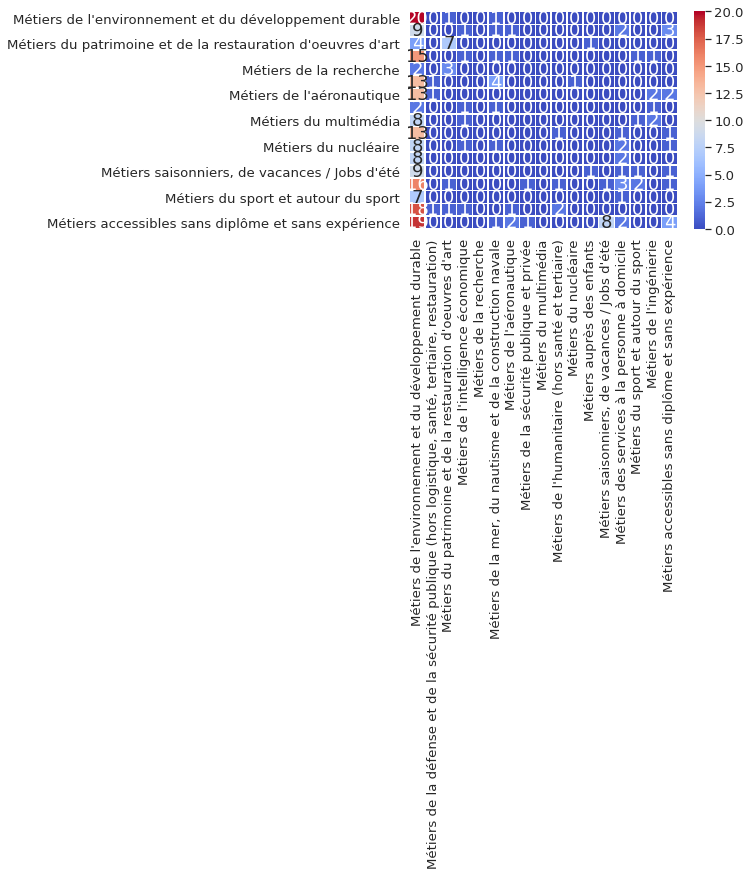

Métiers de l'environnement et du développement durable 0.5811051693404635
Métiers de la défense et de la sécurité publique (hors logistique, santé, tertiaire, restauration) 0.49423076923076925
Métiers du patrimoine et de la restauration d'oeuvres d'art 0.7784591194968554
Métiers de l'intelligence économique 0.515272373540856
Métiers de la recherche 0.5
Métiers de la mer, du nautisme et de la construction navale 0.5936352509179926
Métiers de l'aéronautique 0.5181252681252682
Métiers de la sécurité publique et privée 0.4963235294117647
Métiers du multimédia 0.5
Métiers de l'humanitaire (hors santé et tertiaire) 0.5235871647509578
Métiers du nucléaire 0.4981060606060606
Métiers auprès des enfants 0.49625468164794007
Métiers saisonniers, de vacances / Jobs d'été 0.48295454545454547
Métiers des services à la personne à domicile 0.5530186944529574
Métiers du sport et autour du sport 0.49070631970260226
Métiers de l'ingénierie 0.4881422924901186
Métiers accessibles sans diplôme et sans expéri

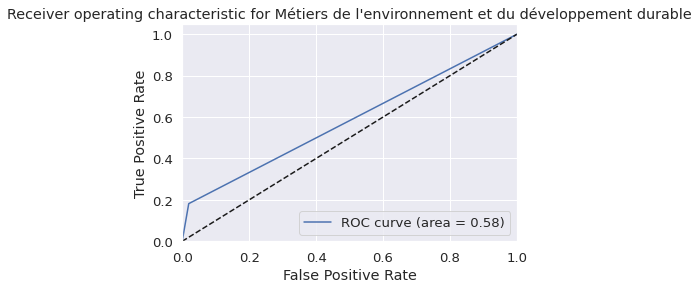

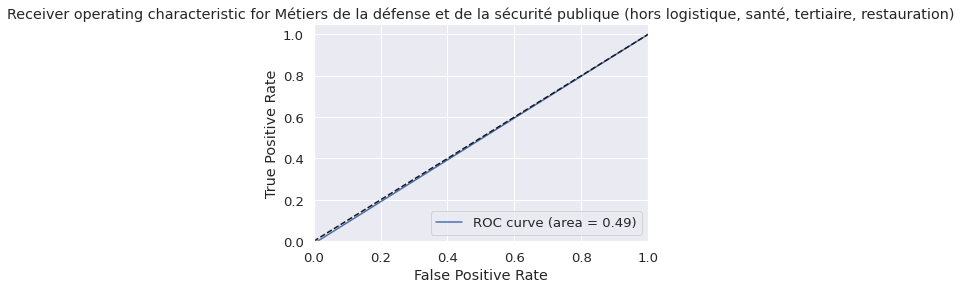

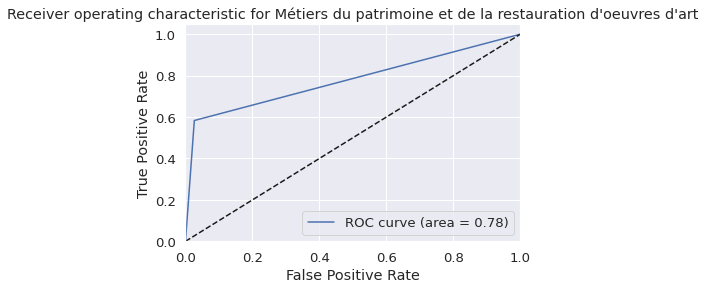

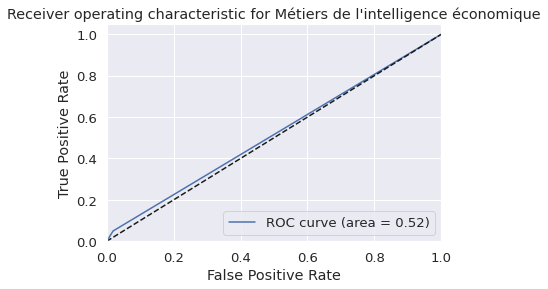

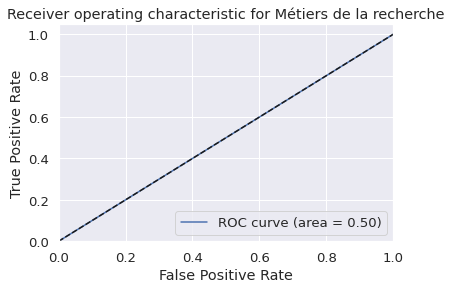

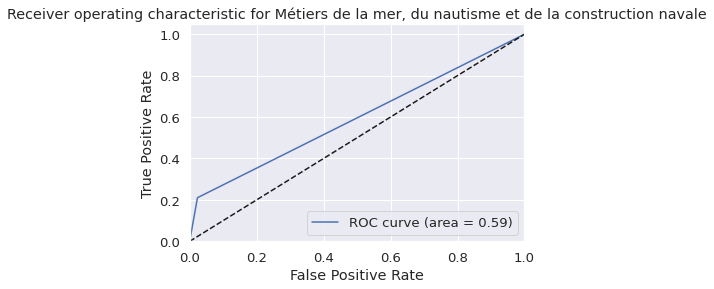

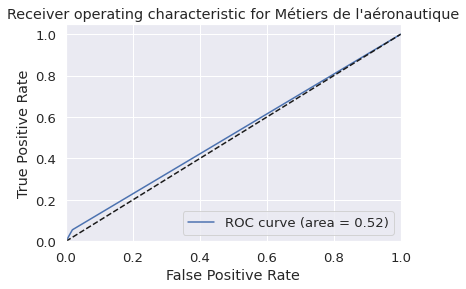

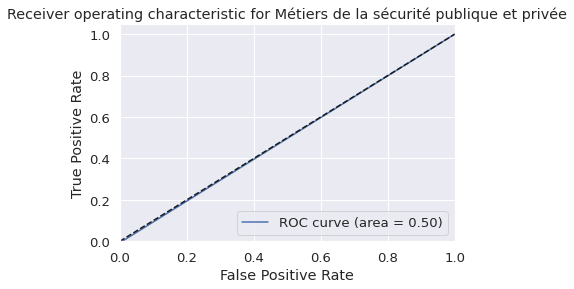

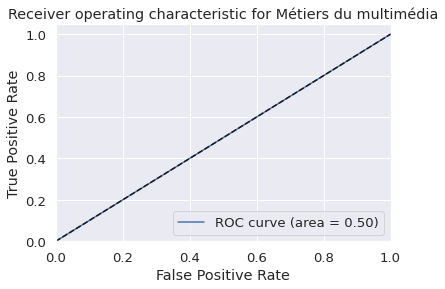

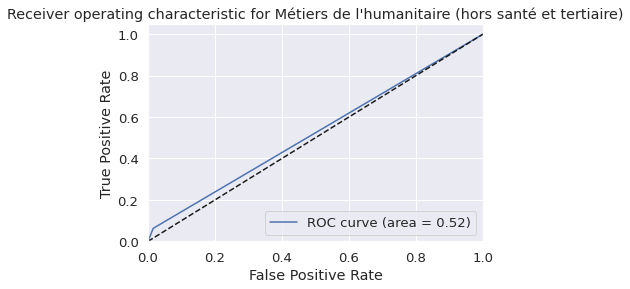

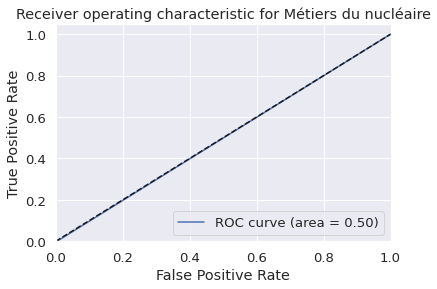

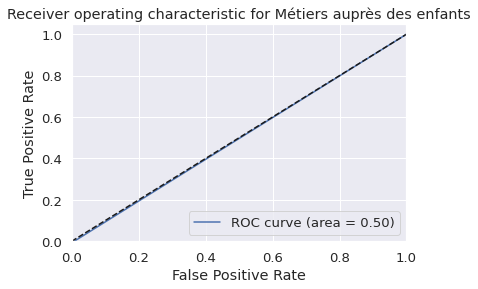

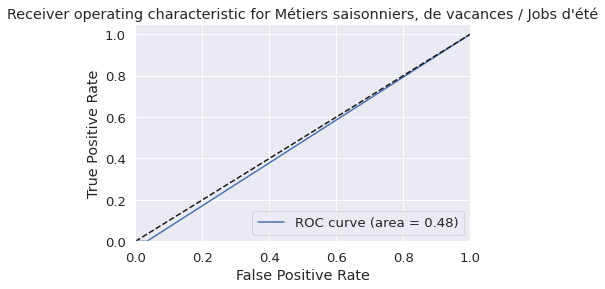

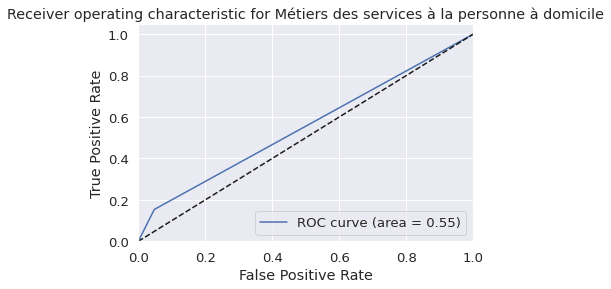

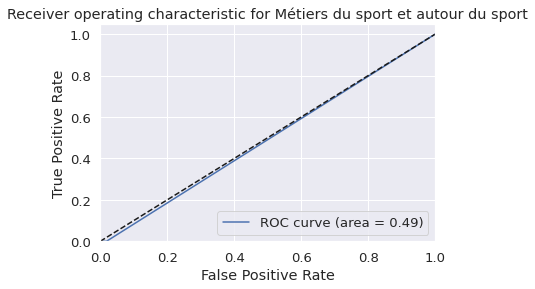

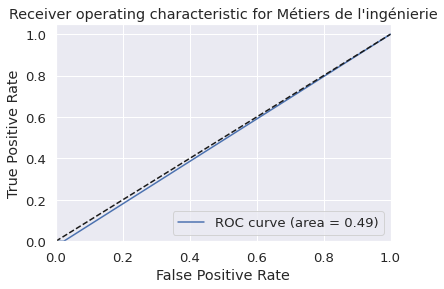

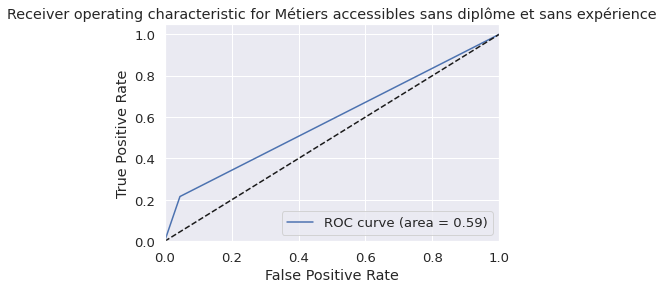

In [ ]:
show_eval(y_dev_lb, y_pred_svm, lb_trained, clf_svm)

# Test webscrapping

In [ ]:
import requests
from bs4 import BeautifulSoup

URL = 'https://www.onisep.fr/Ressources/Univers-Metier/Metiers/serigraphe'
page = requests.get(URL)

soup = BeautifulSoup(page.content, 'html.parser')
results = soup.find(id="en-quoi-consiste-ce-metier")
print(results.prettify())
results.find_all('p')

<div class="ideo-block" id="en-quoi-consiste-ce-metier" tabindex="-1">
 <div class="ideo-inner-width">
  <h2 class="ideo-title-block" tabindex="-1">
   En quoi consiste ce métier ?
  </h2>
  <div class="ezxmltext-field">
   <p>
    Un dessin sur un T-shirt, un logo sur un porte-clefs, un motif qui orne un sac à dos ou une casquette, des autocollants... la sérigraphie est partout ! Cette technique d'impression traditionnelle permet au sérigraphe d'imprimer des motifs sur toutes sortes de supports : bois, tissu, verre, papier, métal... Les couleurs sont illimitées et le résultat obtenu s'utilise dans la publicité, la décoration, la mode, la céramique, l'aéronautique, les industries du verre, du luxe, de l'électronique, de l'automobile...
   </p>
   <p>
    Après avoir fabriqué une image négative du motif, le sérigraphe la reporte sur un écran en toile sous lequel est placé le support à imprimer. Il dépose l'encre sur le dessus de l'écran et la fait pénétrer avec une racle à travers les p

[<p>Un dessin sur un T-shirt, un logo sur un porte-clefs, un motif qui orne un sac à dos ou une casquette, des autocollants... la sérigraphie est partout ! Cette technique d'impression traditionnelle permet au sérigraphe d'imprimer des motifs sur toutes sortes de supports : bois, tissu, verre, papier, métal... Les couleurs sont illimitées et le résultat obtenu s'utilise dans la publicité, la décoration, la mode, la céramique, l'aéronautique, les industries du verre, du luxe, de l'électronique, de l'automobile...</p>,
 <p>Après avoir fabriqué une image négative du motif, le sérigraphe la reporte sur un écran en toile sous lequel est placé le support à imprimer. Il dépose l'encre sur le dessus de l'écran et la fait pénétrer avec une racle à travers les parties non obturées de l'écran. Le travail à la main se fait rare : l'informatique et les lignes d'impression numérisées notamment le supplantent peu à peu.</p>,
 <p>Créatif et minutieux, le sérigraphe doit également savoir s'adapter aux 

[<p>Un dessin sur un T-shirt, un logo sur un porte-clefs, un motif qui orne un sac à dos ou une casquette, des autocollants... la sérigraphie est partout ! Cette technique d'impression traditionnelle permet au sérigraphe d'imprimer des motifs sur toutes sortes de supports : bois, tissu, verre, papier, métal... Les couleurs sont illimitées et le résultat obtenu s'utilise dans la publicité, la décoration, la mode, la céramique, l'aéronautique, les industries du verre, du luxe, de l'électronique, de l'automobile...</p>,
 <p>Après avoir fabriqué une image négative du motif, le sérigraphe la reporte sur un écran en toile sous lequel est placé le support à imprimer. Il dépose l'encre sur le dessus de l'écran et la fait pénétrer avec une racle à travers les parties non obturées de l'écran. Le travail à la main se fait rare : l'informatique et les lignes d'impression numérisées notamment le supplantent peu à peu.</p>,
 <p>Créatif et minutieux, le sérigraphe doit également savoir s'adapter aux 

<div class="ideo-block" id="en-quoi-consiste-ce-metier" tabindex="-1">
 <div class="ideo-inner-width">
  <h2 class="ideo-title-block" tabindex="-1">
   En quoi consiste ce métier ?
  </h2>
  <div class="ezxmltext-field">
   <p>
    Un dessin sur un T-shirt, un logo sur un porte-clefs, un motif qui orne un sac à dos ou une casquette, des autocollants... la sérigraphie est partout ! Cette technique d'impression traditionnelle permet au sérigraphe d'imprimer des motifs sur toutes sortes de supports : bois, tissu, verre, papier, métal... Les couleurs sont illimitées et le résultat obtenu s'utilise dans la publicité, la décoration, la mode, la céramique, l'aéronautique, les industries du verre, du luxe, de l'électronique, de l'automobile...
   </p>
   <p>
    Après avoir fabriqué une image négative du motif, le sérigraphe la reporte sur un écran en toile sous lequel est placé le support à imprimer. Il dépose l'encre sur le dessus de l'écran et la fait pénétrer avec une racle à travers les p

In [ ]:
import requests
from bs4 import BeautifulSoup

URL = 'https://www.monster.com/jobs/search/?q=Software-Developer&where=Australia'
page = requests.get(URL)

soup = BeautifulSoup(page.content, 'html.parser')
results = soup.find(id='ResultsContainer')
print(results.prettify())


<div class="mux-custom-scroll" data-extend="left" data-mux="customScroll" data-target="html" id="ResultsContainer">
 <div class="scrollable" id="ResultsScrollable">
  <script type="application/ld+json">
   {"@context":"https://schema.org","@type":"ItemList","mainEntityOfPage":{
            "@type":"CollectionPage","@id":"https://www.monster.com/jobs/search/?q=Software-Developer&amp;where=Australia"
            }
            ,"itemListElement":[

                 {"@type":"ListItem","position":1,"url":"https://job-openings.monster.com/software-engineer-full-stack-sydney-new-south-wales-sydney-nsw-us-mri-software/2abbd945-9020-4bc6-a0fe-bd16e0caa778"}
                    ,
                 {"@type":"ListItem","position":2,"url":""}
                    ,
                 {"@type":"ListItem","position":3,"url":"https://job-openings.monster.com/principal-consultant-automation-devops-melbourne-ga-us-dialog-group/15a6d27e-9b31-4417-9806-c13bf4d74e3f"}
                    ,
                 {"

# Brouillons

In [ ]:
!wget https://www.data.gouv.fr/fr/datasets/r/88342be1-06b8-4ab6-8ce9-83e117d21346  -O arborescence.xlsx

--2021-03-30 21:33:06--  https://www.data.gouv.fr/fr/datasets/r/88342be1-06b8-4ab6-8ce9-83e117d21346
Resolving www.data.gouv.fr (www.data.gouv.fr)... 37.59.183.93
Connecting to www.data.gouv.fr (www.data.gouv.fr)|37.59.183.93|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: http://pole-emploi.org/files/live/sites/peorg/files/documents/Statistiques-et-analyses/Open-data/ROME/ROME_ArboPrincipale.xlsx [following]
--2021-03-30 21:33:08--  http://pole-emploi.org/files/live/sites/peorg/files/documents/Statistiques-et-analyses/Open-data/ROME/ROME_ArboPrincipale.xlsx
Resolving pole-emploi.org (pole-emploi.org)... 185.215.64.44
Connecting to pole-emploi.org (pole-emploi.org)|185.215.64.44|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://pole-emploi.org/files/live/sites/peorg/files/documents/Statistiques-et-analyses/Open-data/ROME/ROME_ArboPrincipale.xlsx [following]
--2021-03-30 21:33:08--  https://pole-emploi.org/fi

In [ ]:
noms_col = ["Grands domaines","Domaines professionnels","ROME","Appelation","Code OGR"]
arborescence = pd.read_excel('arborescence.xlsx', sheet_name=1,
                             header = None, skiprows = 1,
                             names = noms_col)
arborescence[noms_col[1]] = arborescence[noms_col[0]]+arborescence[noms_col[1]]
arborescence[noms_col[2]] = arborescence[noms_col[1]]+arborescence[noms_col[2]]
for col in noms_col[:3]:
  arborescence[col] = arborescence[col].apply(lambda x: re.sub(" +", "", x))
arborescence

,Grands domaines,Domaines professionnels,ROME,Appelation,Code OGR
0,A,A,A,"Agriculture et Pêche, Espaces naturels et Espa...",
1,A,A11,A11,Engins agricoles et forestiers,
2,A,A11,A1101,Conduite d'engins agricoles et forestiers,
3,A,A11,A1101,Chauffeur / Chauffeuse de machines agricoles,11987
4,A,A11,A1101,Conducteur / Conductrice d'abatteuses,12862
...,...,...,...,...,...
11763,N,N44,N4403,Opérateur / Opératrice de branchement du résea...,17064
11764,N,N44,N4403,Opérateur / Opératrice de manoeuvre du réseau ...,17119
11765,N,N44,N4403,Opérateur / Opératrice de production du réseau...,17150
11766,N,N44,N4403,Opérateur / Opératrice fret du réseau ferré,17231


In [ ]:
liste_rome = arborescence["ROME"][arborescence["ROME"].apply(len)==5].unique()
print(len(liste_rome))
liste_rome

532


array(['A1101', 'A1201', 'A1202', 'A1203', 'A1204', 'A1205', 'A1301',
       'A1302', 'A1303', 'A1401', 'A1402', 'A1403', 'A1404', 'A1405',
       'A1406', 'A1407', 'A1408', 'A1409', 'A1410', 'A1411', 'A1412',
       'A1413', 'A1414', 'A1415', 'A1416', 'A1417', 'A1501', 'A1502',
       'A1503', 'A1504', 'B1101', 'B1201', 'B1301', 'B1302', 'B1303',
       'B1401', 'B1402', 'B1501', 'B1601', 'B1602', 'B1603', 'B1604',
       'B1701', 'B1801', 'B1802', 'B1803', 'B1804', 'B1805', 'B1806',
       'C1101', 'C1102', 'C1103', 'C1104', 'C1105', 'C1106', 'C1107',
       'C1108', 'C1109', 'C1110', 'C1201', 'C1202', 'C1203', 'C1204',
       'C1205', 'C1206', 'C1207', 'C1301', 'C1302', 'C1303', 'C1401',
       'C1501', 'C1502', 'C1503', 'C1504', 'D1101', 'D1102', 'D1103',
       'D1104', 'D1105', 'D1106', 'D1107', 'D1201', 'D1202', 'D1203',
       'D1204', 'D1205', 'D1206', 'D1207', 'D1208', 'D1209', 'D1210',
       'D1211', 'D1212', 'D1213', 'D1214', 'D1301', 'D1401', 'D1402',
       'D1403', 'D14

In [ ]:
arborescence["ROME"].apply(len)

0        1
1        3
2        5
3        5
4        5
        ..
11763    5
11764    5
11765    5
11766    5
11767    5
Name: ROME, Length: 11768, dtype: int64